- Data processing are  presented on Jupyter to better intercat with. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, auc, accuracy_score, confusion_matrix, mean_squared_error

In [5]:
!python --version

Python 3.7.1


In [6]:
sns.set(font_scale=1.5)
pd.options.display.max_rows =10
pd.options.display.max_columns = 500
pd.set_option.display_width=1000

df=pd.read_excel('data/GD6.xlsx', index_col=None, header=0)

In [7]:
df.tail()

,CPR_NO,NAME,ENAME,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
24185,70304602,هزاع أحمد يوسف الكعبي,HAZZA AHMED YUSUF ALKAABI,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364
24186,71007423,يوسف سعيد عمير السليمان,YOUSIF SAEED OMAIR ALSULAIMAN,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818
24187,70402183,يوسف عبدالمنعم علي حسين,YOUSIF ABDULMUNEM ALI HUSAIN,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273
24188,70803196,يوسف محمد عبدالله المناعي,YOUSIF MOHAMED ABDULLA ALMANNAEI,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818
24189,70211361,يوسف مصطفى محمد عبدالله,YOUSIF MUSTAFA MOHAMMED ABDULLA,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,29.0,27.0,14.0,16.0,16.0,19.5,59.0,63,61,39.0,81.818182


In [8]:
df[df.GPA>85].count()/df.shape[0]

CPR_NO      0.788094
NAME        0.788094
ENAME       0.788094
SCH_NM      0.788094
PROV_NM     0.788094
              ...   
TOTAL1      0.787846
TOTAL2      0.788094
D_MARK      0.788094
NAT_MARK    0.788094
GPA         0.788094
Length: 18, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24190 entries, 0 to 24189
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPR_NO          24190 non-null  int64  
 1   NAME            24190 non-null  object 
 2   ENAME           24190 non-null  object 
 3   SCH_NM          24190 non-null  object 
 4   PROV_NM         24190 non-null  object 
 5   SUBM            24190 non-null  object 
 6   Teacher_Gender  24190 non-null  object 
 7   ACHIEVEMENTS1   24172 non-null  float64
 8   ACHIEVEMENTS2   24190 non-null  float64
 9   MIDTERM1        24172 non-null  float64
 10  MIDTERM2        24190 non-null  float64
 11  FINAL1          24174 non-null  float64
 12  FINAL2          24190 non-null  float64
 13  TOTAL1          24174 non-null  float64
 14  TOTAL2          24190 non-null  int64  
 15  D_MARK          24190 non-null  int64  
 16  NAT_MARK        24190 non-null  float64
 17  GPA             24190 non-null 

In [10]:
df.keys()

Index(['CPR_NO', 'NAME', 'ENAME', 'SCH_NM', 'PROV_NM', 'SUBM',
       'Teacher_Gender', 'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1',
       'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK',
       'NAT_MARK', 'GPA'],
      dtype='object')

In [11]:
df.shape

(24190, 18)

In [12]:
df=df.drop(['NAME', 'ENAME'], axis=1)

In [13]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [14]:
df.dtypes

CPR_NO              int64
SCH_NM             object
PROV_NM            object
SUBM               object
Teacher_Gender     object
                   ...   
TOTAL1            float64
TOTAL2              int64
D_MARK              int64
NAT_MARK          float64
GPA               float64
Length: 16, dtype: object

In [15]:
subj=["العلوم","الرياضيات"]
df[df.SUBM.isin(subj)].head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [16]:
df.SUBM.unique()

array(['العلوم', 'الرياضيات'], dtype=object)

In [17]:
df.PROV_NM.unique()

array(['محافظة العاصمة', 'المحافظة الشمالية', 'المحافظة الجنوبية',
       'محافظة المحرق'], dtype=object)

In [18]:
df.PROV_NM = df["PROV_NM"].map({'المحافظة الجنوبية':'South', 'المحافظة الشمالية':'North',\
                                'محافظة العاصمة': 'Cap',  \
                                'محافظة المحرق':'Muharaq'})

In [19]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [20]:
df.SUBM = df["SUBM"].map({'العلوم':'Science',   
                          'الرياضيات':'Math'})

In [21]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,Science,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,Science,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,Science,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,Science,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,Science,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [22]:
df.Teacher_Gender = df["Teacher_Gender"].map({'مدرسات':'F', 'مدرسين':'M'})

In [23]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [24]:
df.shape

(24190, 16)

In [25]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [26]:
data_column_category

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender'], dtype='object')

In [27]:
df.to_csv("GD6_clean.csv")

In [28]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# for i in data_column_category:

#     df[i] = label_encoder.fit_transform(df[i])

# print("Label Encoded Data: ")

# df.head()

In [29]:
df.iloc[:,1:].describe()

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
count,24172.000000,24190.000000,24172.000000,24190.000000,24174.00000,24190.000000,24174.000000,24190.000000,24190.000000,24190.000000,24190.000000
mean,28.013205,28.226147,16.396359,16.233038,37.58565,35.387970,82.145321,80.090492,81.366226,51.163878,89.781241
std,2.516684,2.404484,3.691991,3.738233,10.61787,8.338934,15.120198,12.775070,13.360015,10.752687,6.986924
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,27.000000,14.500000,14.000000,31.00000,30.500000,73.000000,72.000000,73.000000,44.200000,86.090909
50%,29.000000,29.000000,17.500000,17.000000,40.00000,37.000000,86.000000,83.000000,84.000000,51.300000,91.090909
75%,30.000000,30.000000,19.000000,19.000000,46.00000,42.000000,94.000000,90.000000,92.000000,58.300000,95.000000
max,30.000000,30.000000,20.000000,20.000000,94.00000,94.000000,100.000000,100.000000,100.000000,90.000000,99.818182


In [30]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [31]:
#sns.pairplot(df,hue = 'PROV_NM',diag_kind = "kde",kind = "scatter",palette = "husl")


In [32]:
df["PROV_NM"].value_counts()

North      8246
South      5936
Muharaq    5046
Cap        4962
Name: PROV_NM, dtype: int64

In [33]:
cols = ['PROV_NM',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA']


## توزيع نتائج الامتحانات النهائية حسب المحافظات

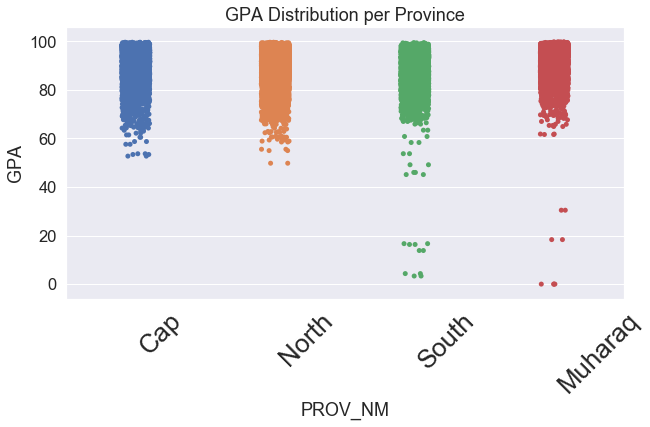

In [34]:

plt.figure(figsize=(10,5))
a= sns.stripplot(y = "GPA", x = "PROV_NM", data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("GPA Distribution per Province")
plt.show()

## توزيع تنائج الاختبارات الوطنية حسب المحافظات

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

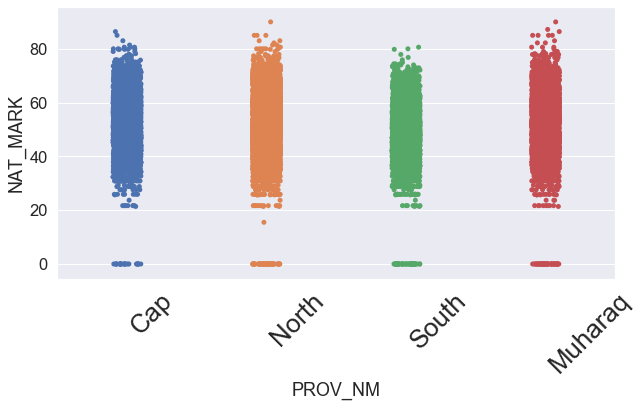

In [35]:
plt.figure(figsize=(10,5))
a= sns.stripplot(y = "NAT_MARK", x = "PROV_NM", data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)

## نماذج التوزيع الطبيعي لنتائج النهائية حسب المحافظات

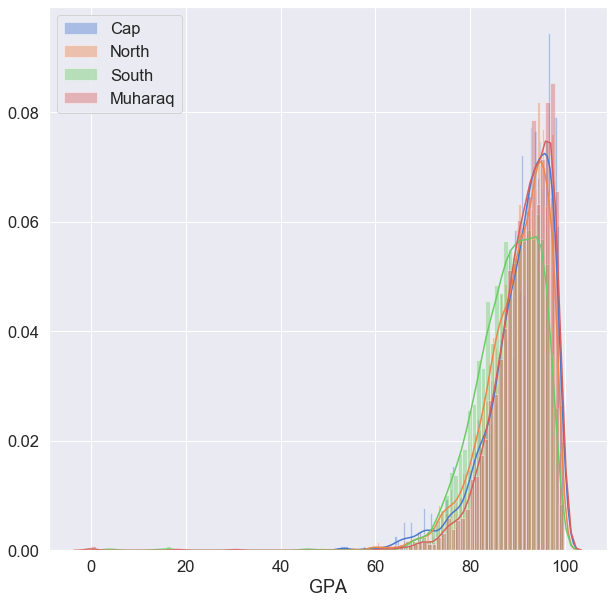

In [36]:
plt.figure(figsize=(10,10))
sns.set_palette("muted")
for i in df.PROV_NM.unique():
    sns.distplot(df.GPA[df.PROV_NM==i],         kde=1,label='{}'.format(i) , bins=100)
    plt.show

plt.legend(loc="upper left")

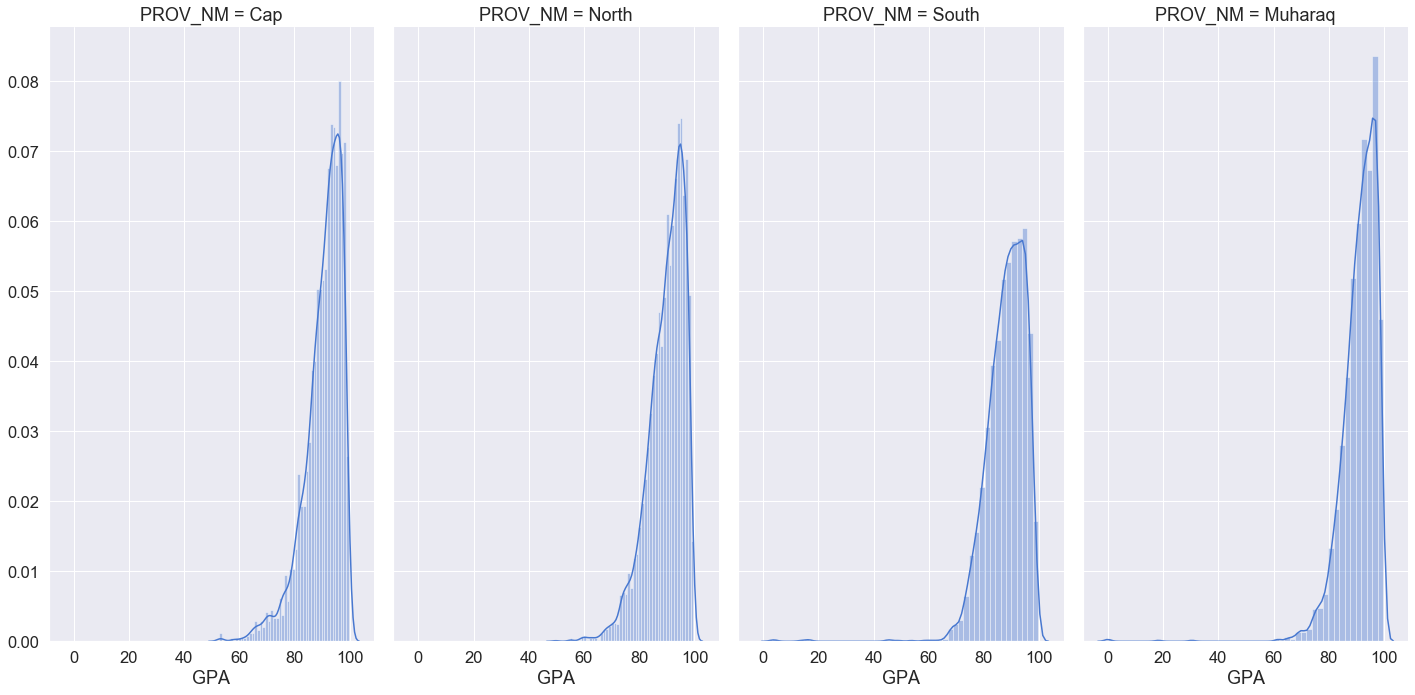

In [37]:
g=sns.FacetGrid(df, col="PROV_NM", aspect=.5, height=10)
g.map(sns.distplot,"GPA" )

In [38]:
print(f'GPA Student mean           {df.GPA.mean():2.2f} :      MEdian {df.GPA.median():2.2f}  :      STD: {df.GPA.std():2.2f}')
print(f'National EXam Student mean {df.NAT_MARK.mean():2.2f}:  MEdian {df.NAT_MARK.median():2.2f} :  STD :  {df.NAT_MARK.std():2.2f}')

GPA Student mean           89.78 :      MEdian 91.09  :      STD: 6.99
National EXam Student mean 51.16:  MEdian 51.30 :  STD :  10.75


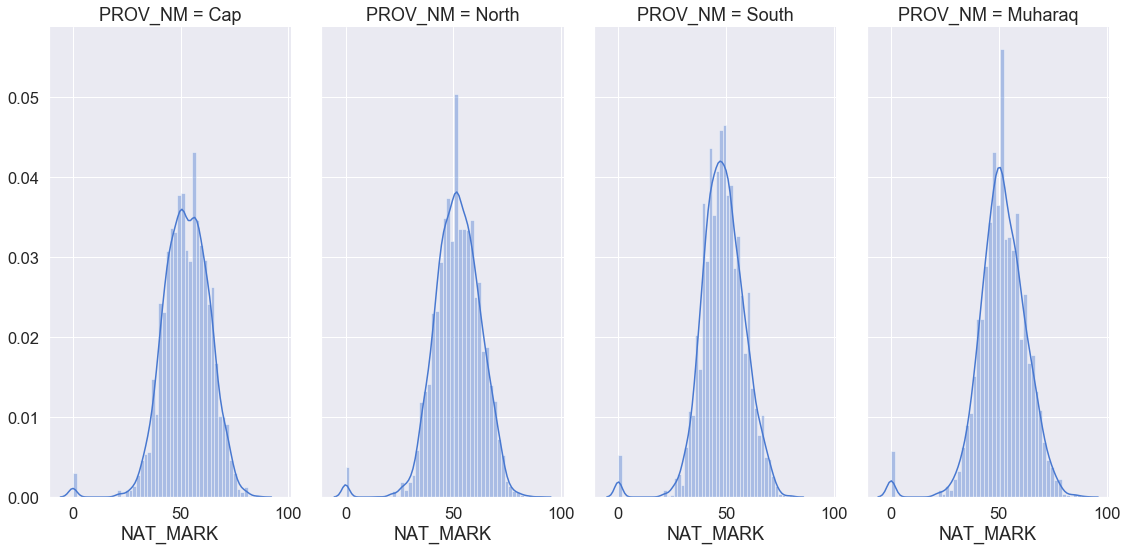

In [39]:
g=sns.FacetGrid(df, col="PROV_NM" , aspect=.5, height=8)
g.map(sns.distplot,"NAT_MARK", bins=50)

## توزيع الأصفار خلال الاختبارات الوطنية حسب المحافظات

,NAT_MARK
PROV_NM,
Cap,26
Muharaq,52
North,56
South,50


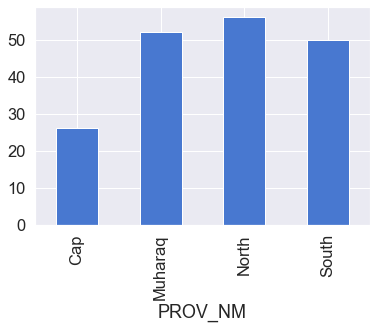

In [40]:
# Zeros distribution by Province
Zs=df[df.NAT_MARK==0].groupby(["PROV_NM"]).agg({"NAT_MARK":"count"})
# sns.stripplot(y = "NAT_MARK", x = Zs.index, data = df)
Zs.NAT_MARK.plot(kind="bar")
Zs

## for i in df.PROV_NM.unique():
sns.distplot(df.D_MARK[df.PROV_NM==i],
                 kde=1,label='{}'.format(i))

plt.legend()

 plot 4. grpahs, each for A province.   draw average and the mean adn The mode .   observe their order and look if the mean is far less or more than the average.  
 if data was for a prduct to sale, we could say that those item are over or under priced
 

#  Tests for Normal Distribution
###  1. Statistical Normality Tests: D’Agostino’s $K^2 Test$ 



In [41]:
from scipy import stats
Gpa_test,GPA_P = stats.normaltest(df.GPA)
print(f'GPA Normal test result  (P-value): {GPA_P}')

Nat_test,Nat_P = stats.normaltest(df.NAT_MARK)
print(f'National Exam Normal test result  (P-value): {Nat_P}')



GPA Normal test result  (P-value): 0.0
National Exam Normal test result  (P-value): 0.0


- p value (0 )is less than our alpha (significance value  0.05), we can **reject the hypothesis that this sample data is normally distributed**

###  2. Statistical Normality Tests : Q-Q plot

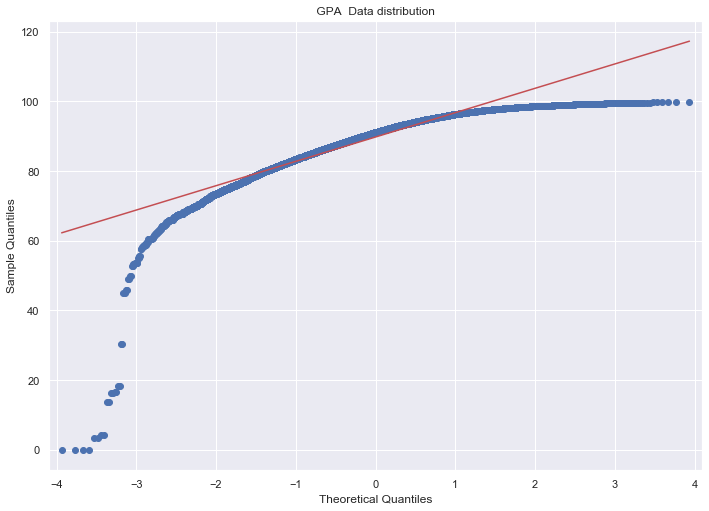

In [222]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df.GPA, line='s')
plt.title(" GPA  Data distribution ")
plt.show()

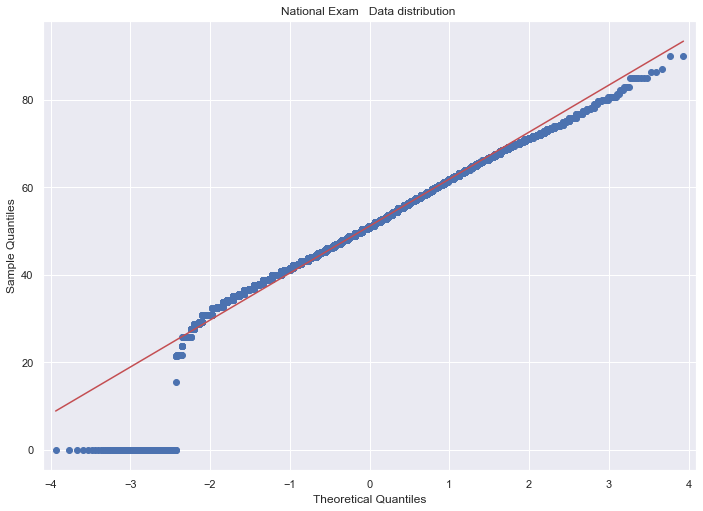

In [223]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df.NAT_MARK, line='s')
plt.title("National Exam   Data distribution ")
plt.show()

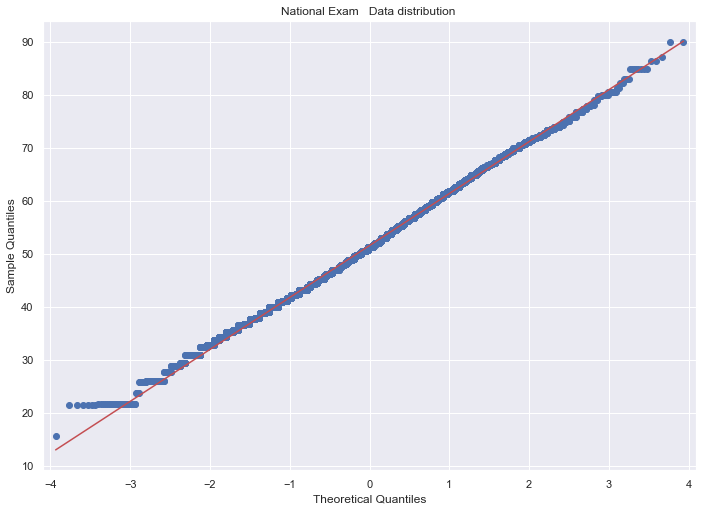

In [224]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df[df.NAT_MARK>0].NAT_MARK, line='s')
plt.title("National Exam   Data distribution ")
plt.show()

## نماذج التوزيع الطبيعي لنتائج الاختبارات الوطنية حسب المحافظات

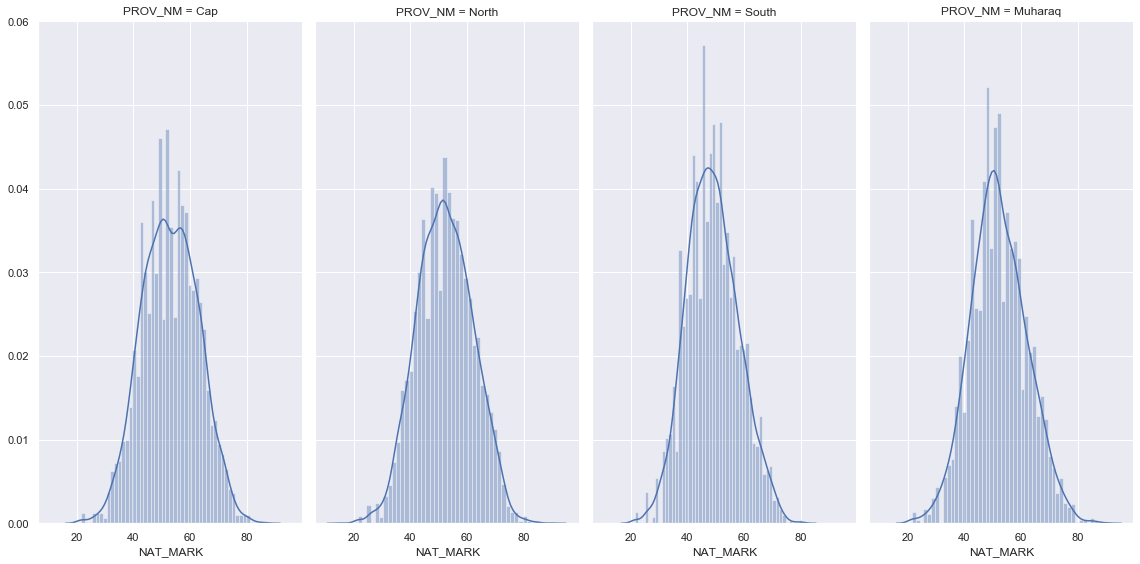

In [225]:
g=sns.FacetGrid(df[df.NAT_MARK>0], col="PROV_NM" , aspect=.5, height=8)
g.map(sns.distplot,"NAT_MARK", bins=50)

In [226]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA', 'GPA_class',
       'NAT_class'],
      dtype='object')

###  3. Statistical Normality Tests - Shapiro 

In [227]:
from scipy.stats import shapiro
stat, p = shapiro(df.sample(frac=0.2,weights="GPA",   random_state=1).GPA)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.923, p=0.000


In [228]:

stat, p = shapiro(df[df.NAT_MARK>0].sample(n=5000,weights="NAT_MARK" , random_state=1).NAT_MARK)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.998, p=0.000


- p value (0 )is less than our alpha (significance value  0.05), we can **reject the hypothesis that this sample data is normally distributed**

###  4. Statistical Normality Tests – Anderson-Darling Test 

In [229]:
from scipy.stats import anderson
result = anderson(df.GPA)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 411.521
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [230]:
from scipy.stats import anderson
result = anderson(df.NAT_MARK)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 46.457
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


#   نتائج الامتحانات النهائية في مادتي العلوم والرياضيات

 National Exam GPA  Median value : 91.09


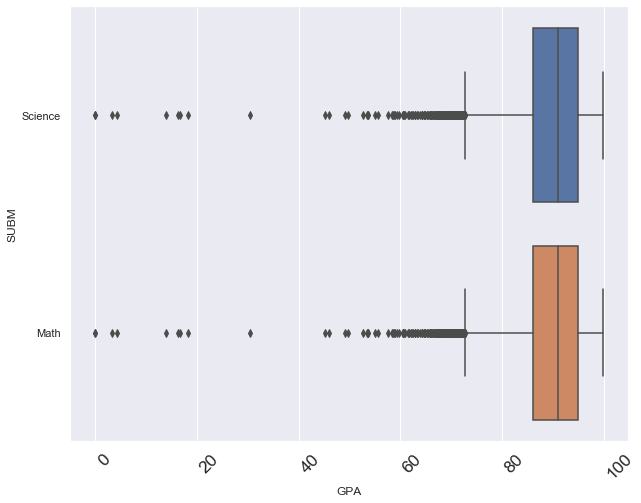

In [231]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df["GPA"], df.SUBM, data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)
#plt.title( "  Student  GPA.  per Subject")
print(' National Exam GPA  Median value : {:2.2f}'.format(df.GPA.median()))

 # نتائج الطلبة خلال اختبار الامتحانات الوطنية في مادتي العلوم والرياضيات

Median value : 51.30


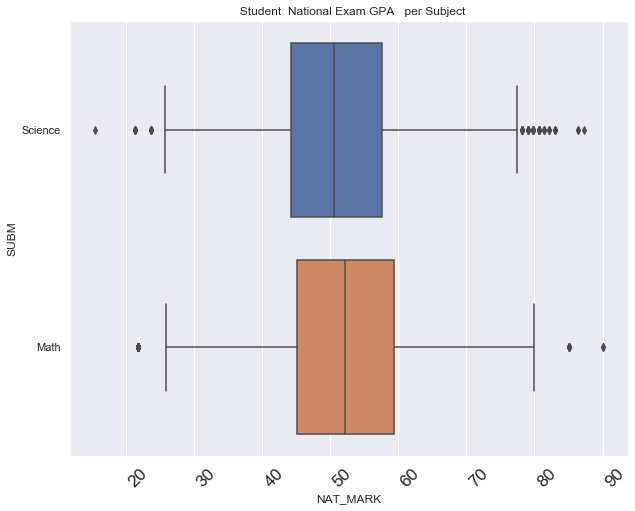

In [232]:

fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df[df.NAT_MARK>0]["NAT_MARK"], df.SUBM, data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)
plt.title( "  Student  National Exam GPA   per Subject")
print( "Median value : %2.2f"  % (df.NAT_MARK.median()))

  #  نتائج الطلبة في أعمال الفصل الأول والثاني

<Figure size 720x576 with 0 Axes>

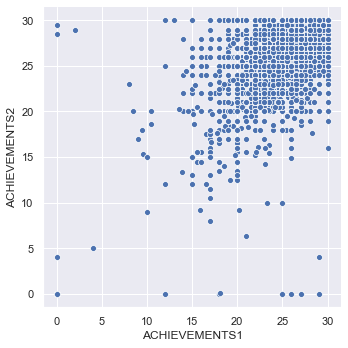

In [233]:
# tracking correlatin between both Achievements
plt.figure(figsize=(10,8))
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2",  data=df)
plt.show()

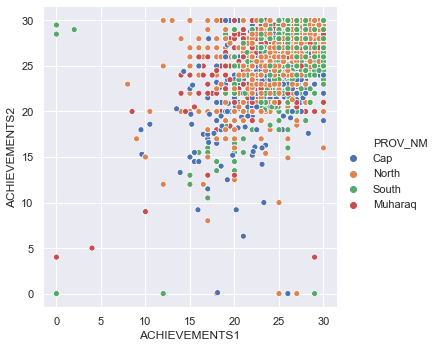

In [234]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="PROV_NM")
plt.show()

  ## مقارنة جندرية للمدرسين حسب نتائج الطلبة في أعمال الفصل الأول والثاني

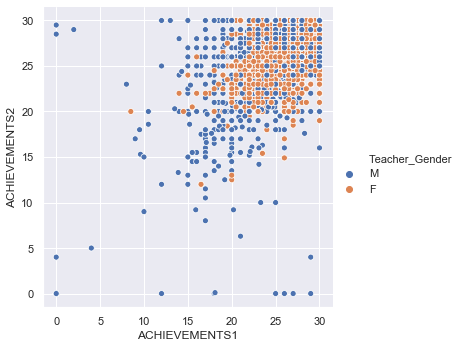

In [235]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="Teacher_Gender")
plt.show()

<Figure size 720x576 with 0 Axes>

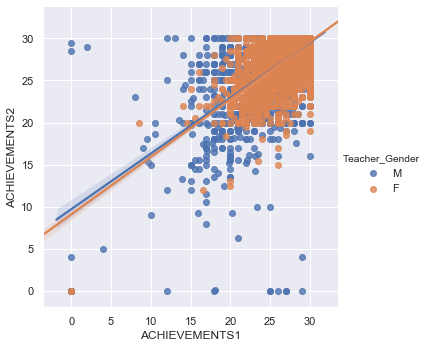

In [236]:
# sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="Teacher_Gender")
plt.figure(figsize=(10,8))
sns.lmplot("ACHIEVEMENTS1", "ACHIEVEMENTS2", data=df, hue="Teacher_Gender")

##  تحصيل الطلاب في الامتحان الوطني ، بالمقارنة مع التحصيل النهائي

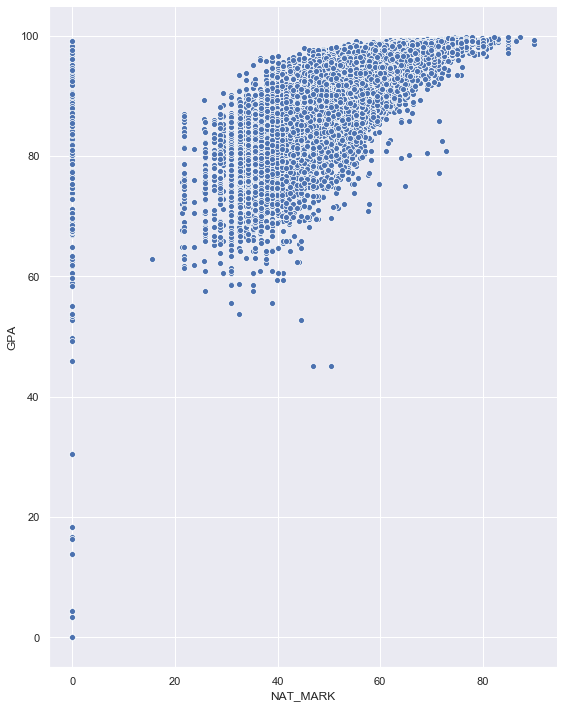

In [237]:
sns.relplot(x="NAT_MARK", y="GPA", data=df, aspect=.8, height=10)

- Notice those Student with 0 @ NAT_MARK

## توزيع تحصيل الطلاب ،الحاصلين على اقل من 50٪ في الامتحان الوطني ،  خلال الدور الثاني

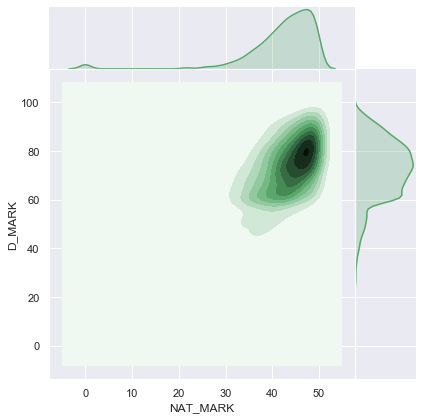

In [238]:
# big proportion of sll thos who had less than 50% in National Exam got around 80% in  دور ثاني
sns.jointplot(df[df["NAT_MARK"]<50]["NAT_MARK"], df[df["NAT_MARK"]<50]["D_MARK"], space=0, color="g", kind="kde")

## معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحانات الوطني ، خلال الدور الثاني

In [239]:
print(f'{ df[df["NAT_MARK"]<50].NAT_MARK.mean():2.2f} معدّل الطلاب الحاصلين على اقل من 50٪ في الامتحانات الوطني '  )


print(f'{df[df["NAT_MARK"]<50].D_MARK.mean():2.2f}  معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحان الوطني ، خلال الدور الثاني')

42.27 معدّل الطلاب الحاصلين على اقل من 50٪ في الامتحانات الوطني 
72.05  معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحان الوطني ، خلال الدور الثاني


## معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحانات الوطني ، في نهائي الفصل الثاني

In [240]:
print(f'{ df[df["NAT_MARK"]<50].NAT_MARK.mean():2.2f} معدّل الطلاب الحاصلين على اقل من 50٪ في الامتحانات الوطني '  )
print(f'{ df[df["NAT_MARK"]<50].TOTAL2.mean():2.2f}    معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحانات الوطني ، في نهائي الفصل الثاني' )
      

42.27 معدّل الطلاب الحاصلين على اقل من 50٪ في الامتحانات الوطني 
71.46    معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحانات الوطني ، في نهائي الفصل الثاني


## توزيع الطلاب ،الحاصلين على  0 في الامتحانات الوطني ، على المحافطات

In [251]:
# à fixer pour extraire tous ceux qui ont eu 0 D_mark et NAT_MARK
df.query("NAT_MARK==0").groupby(["PROV_NM"]).agg({"PROV_NM":"size"})

,PROV_NM
PROV_NM,
Cap,26
Muharaq,50
North,56
South,50


In [252]:
df[df.NAT_MARK==0].NAT_MARK.value_counts()

0.0    182
Name: NAT_MARK, dtype: int64

 ## مقارنة جندرية للمدرسين حسب نتائج الطلبة في مادتي العلوم والرياضيات
 ### الامتحانات الوطنية

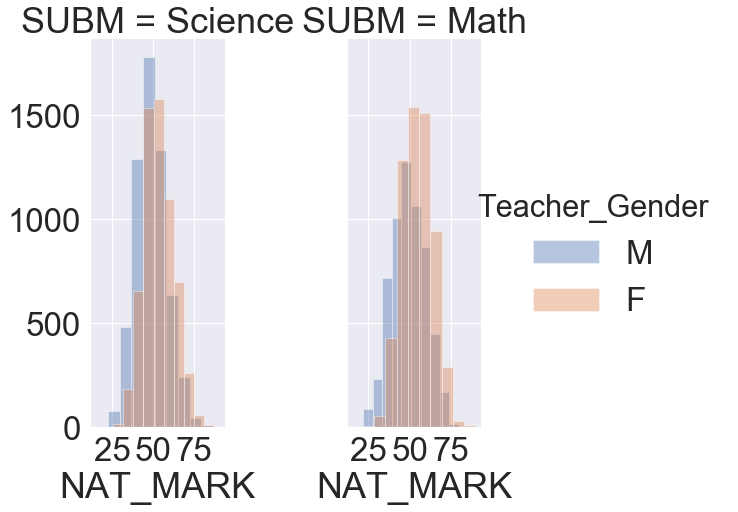

In [253]:
g=sns.FacetGrid(df[df.NAT_MARK>0], col="SUBM", hue="Teacher_Gender", height=8, aspect=.5)
g.map(sns.distplot, "NAT_MARK", bins=10, kde=0)
g.add_legend()
plt.show()

###  التحصيل النهائي

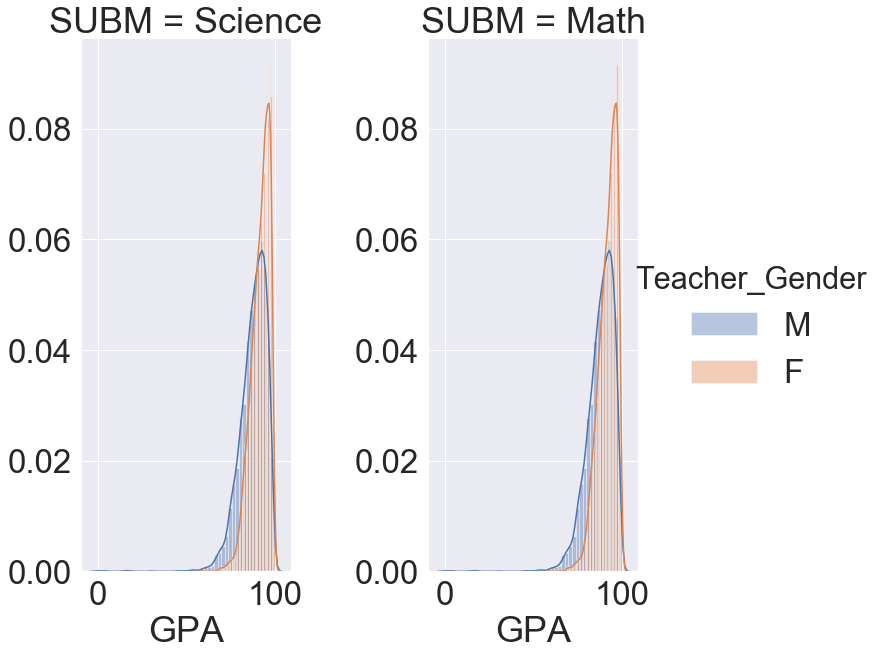

In [254]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender",  height=10, aspect=.5, sharey=False)
g.map(sns.distplot, "GPA", bins=50)
g.add_legend()
plt.show()

## مقارنة جندرية للمدرسين حسب نتائج الطلبة في نهائيي الفصلين الأول والثاني في مادتي العلوم والرياضيات

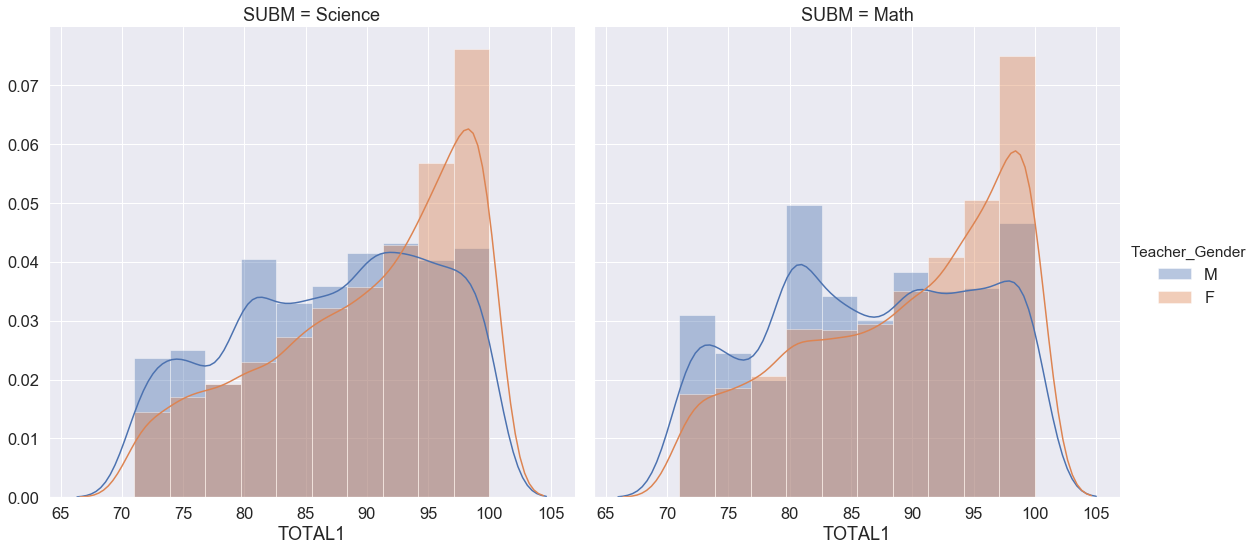

In [255]:
#. range.  80-100, kde 0 or 1
sns.set(font_scale=1.5)
g=sns.FacetGrid(df[df["TOTAL1"]>70], col="SUBM",  hue="Teacher_Gender", aspect=1,  height=8)
g.map(sns.distplot, "TOTAL1", bins=10, kde=1)
g.add_legend()
plt.show()

In [256]:
df.groupby("PROV_NM").Teacher_Gender.value_counts()

PROV_NM  Teacher_Gender
Cap      F                 2856
         M                 2104
Muharaq  F                 2622
         M                 2420
North    F                 4124
         M                 4120
South    M                 3268
         F                 2658
Name: Teacher_Gender, dtype: int64

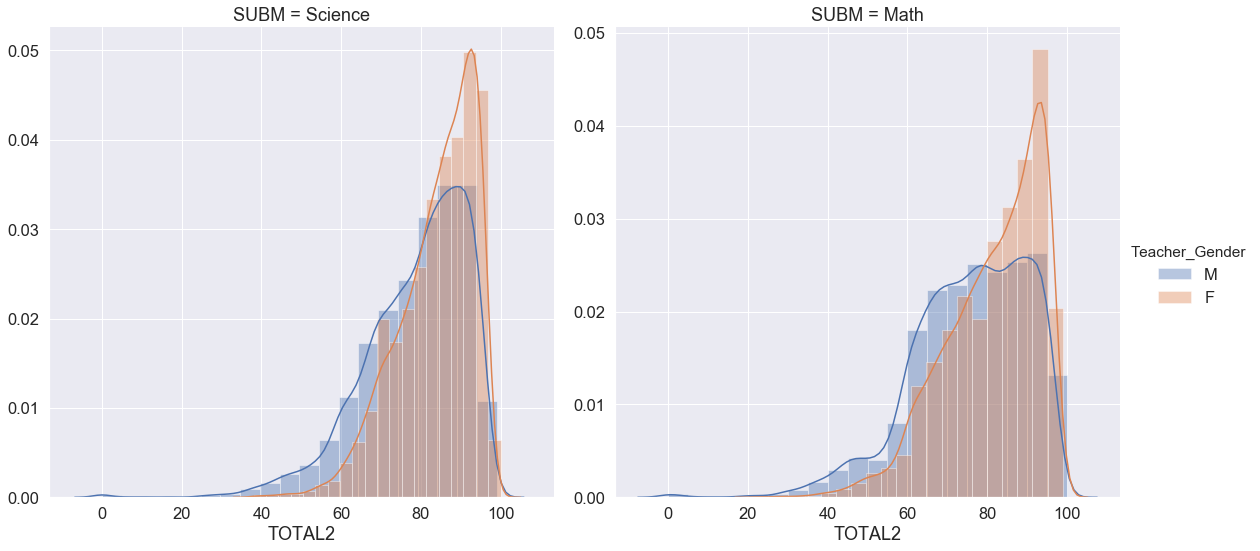

In [257]:
sns.set(font_scale=1.5)
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=1,  height=8, sharey=False )
g.map(sns.distplot, "TOTAL2", bins=20, kde=1)
g.add_legend()
plt.show()

##   مقارنة نتائج الطلبة في الفصل الأول بنتائج الاختبارات الوطنية

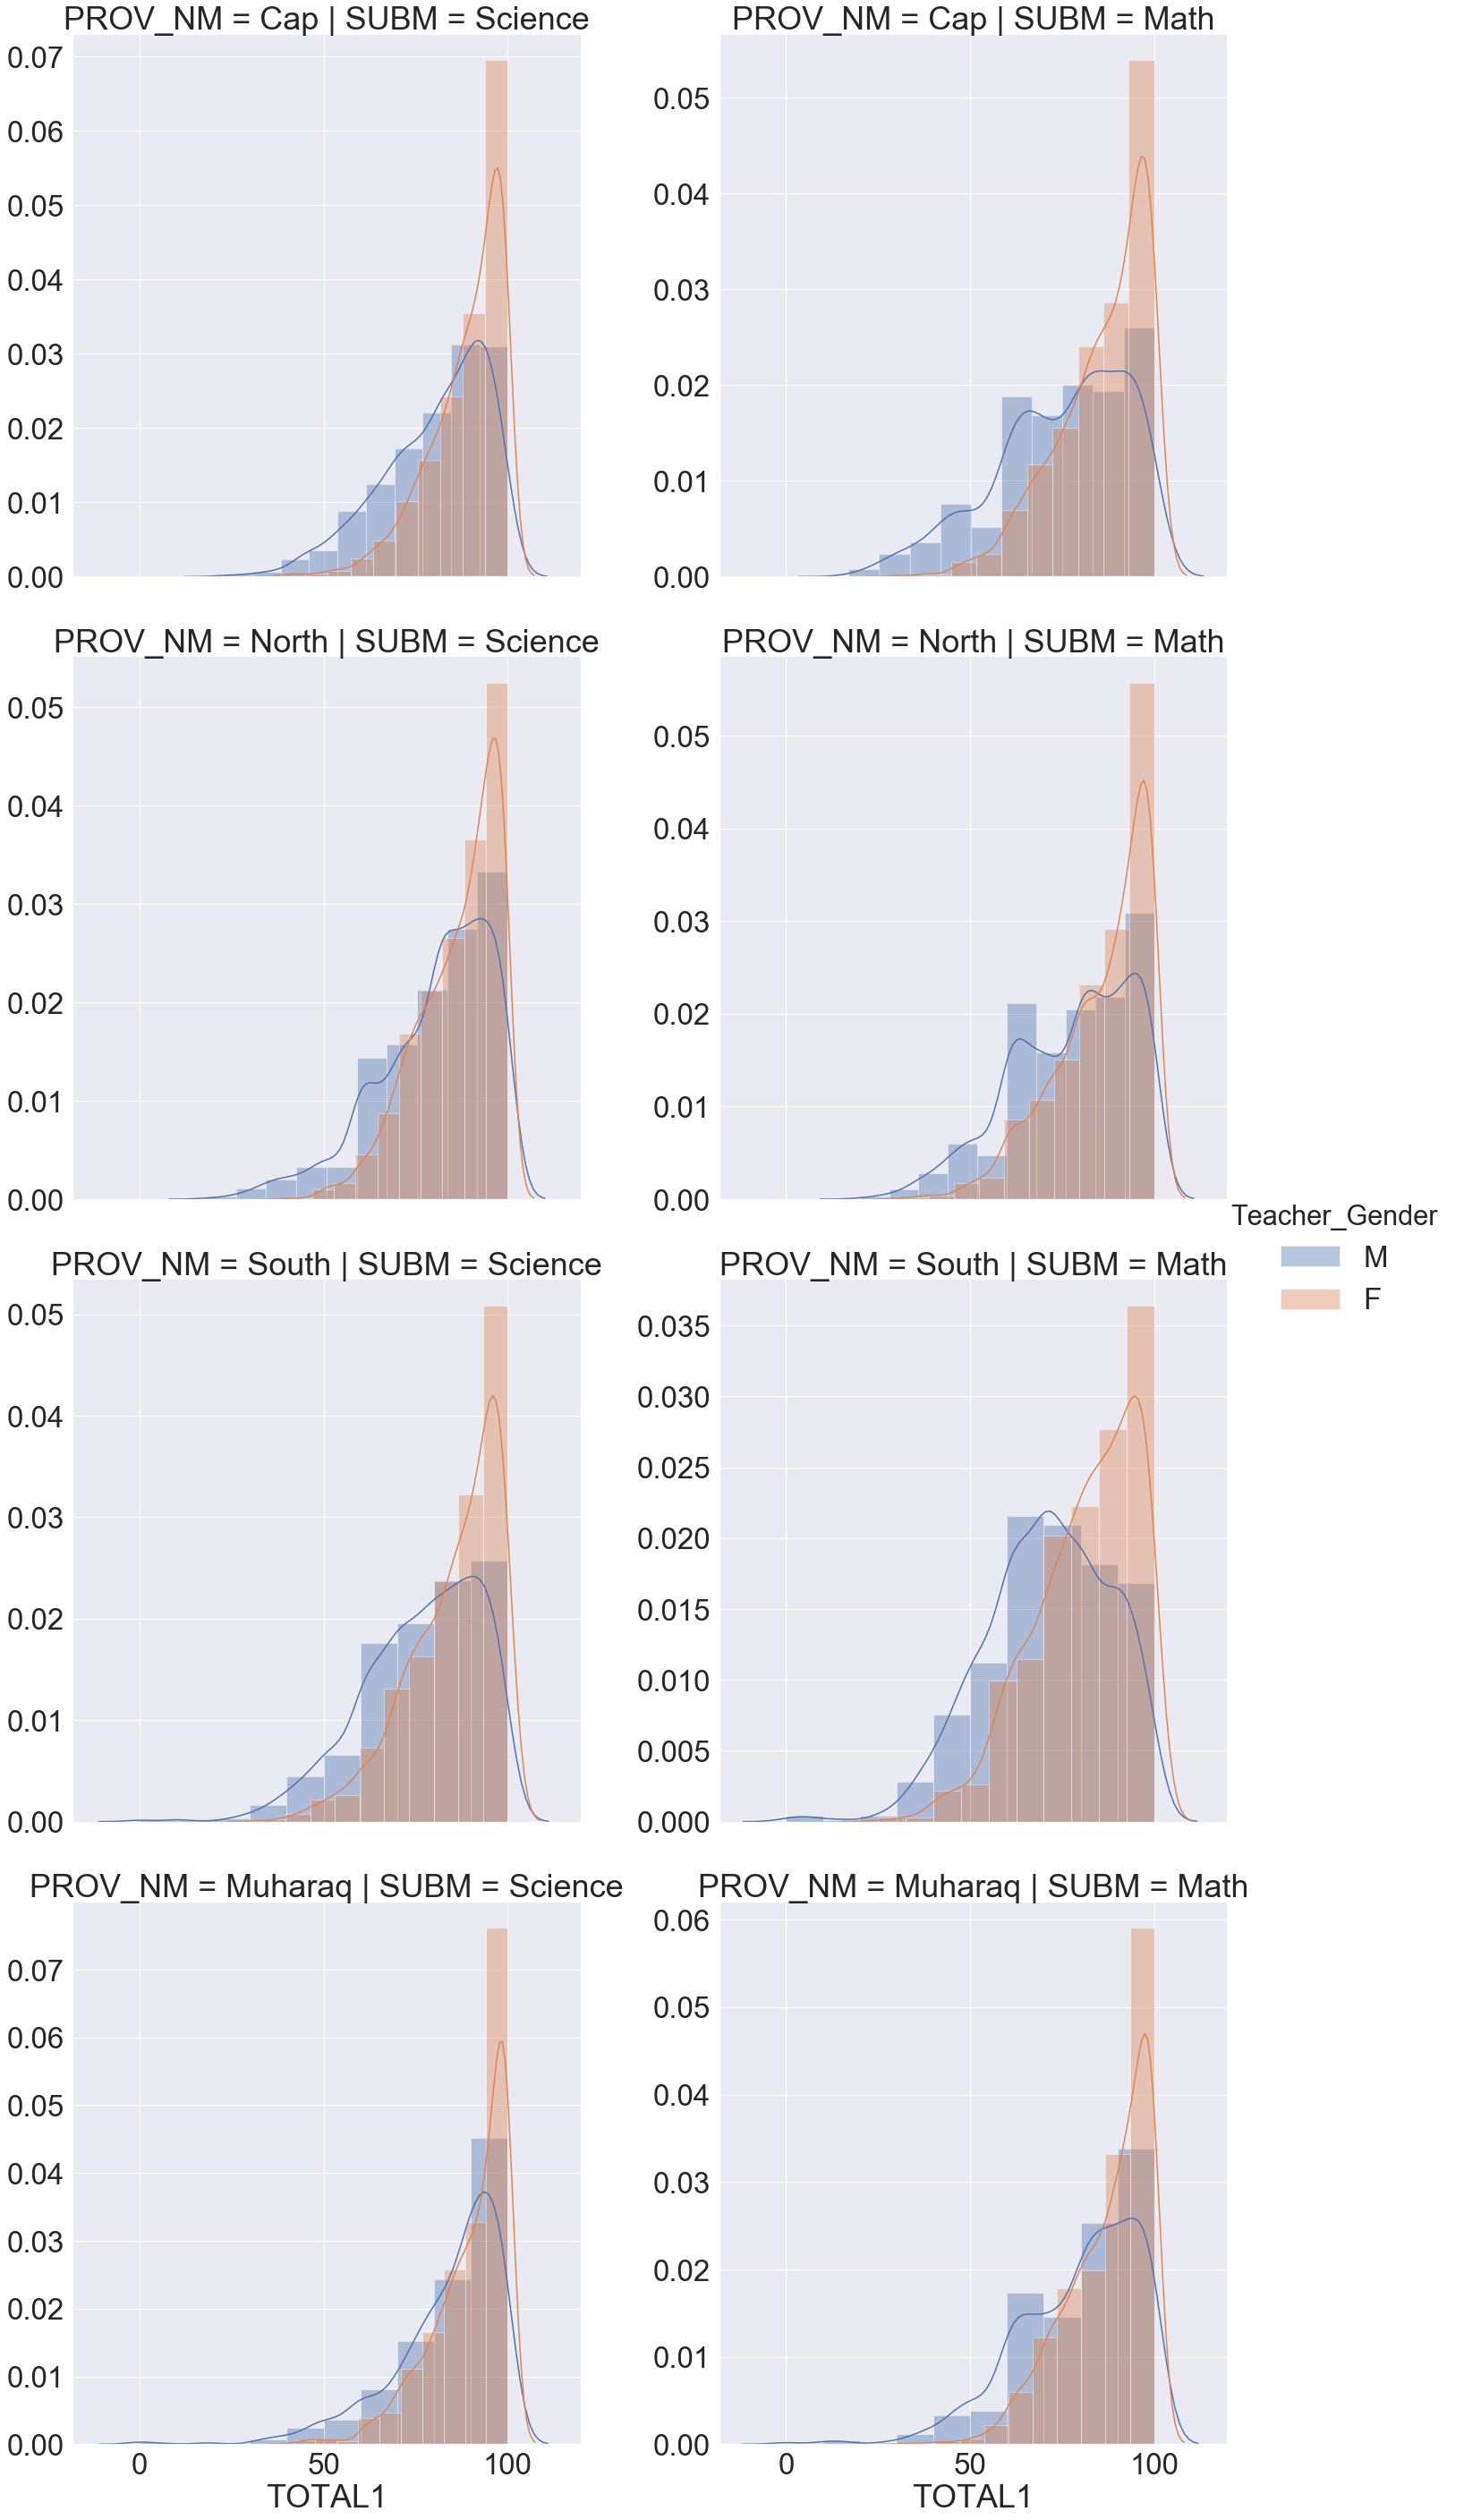

In [258]:
# Students' final results in ligh of Nast exam by Province /. row="Prov_nm" 
sns.set(font_scale=3)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", row="PROV_NM" ,aspect=1,  height=10 , sharey=False)
g.map(sns.distplot, "TOTAL1", bins=10, kde=1) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()

###     التخلص من النتائج الصفرية في الامتحانات الوطنية

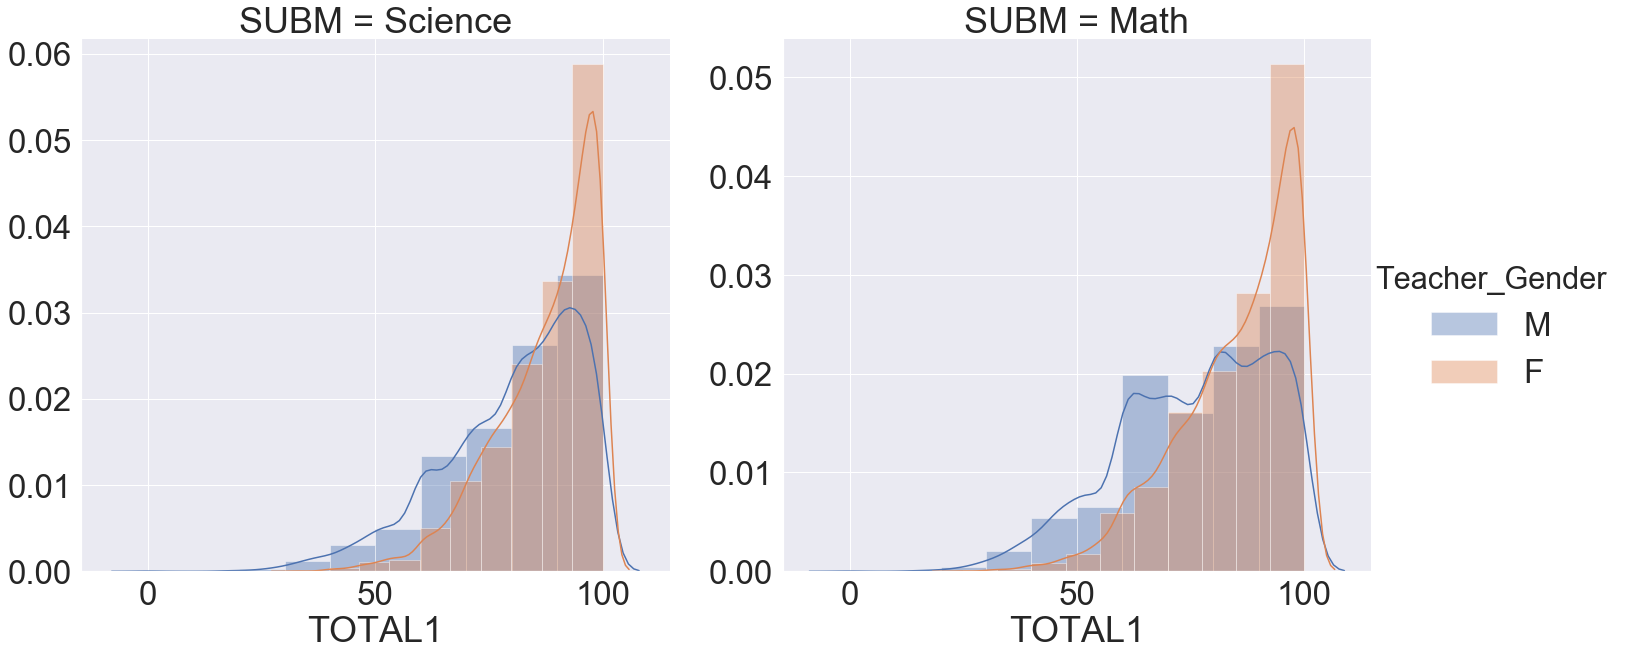

In [259]:
#.  df[df.NAT_MARK>0
sns.set(font_scale=3)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df[df.NAT_MARK>0], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10 , sharey=False)
g.map(sns.distplot, "TOTAL1", bins=10, kde=1) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()


###  الطلبة الحاصلين على نتائج أكثر من 70 في الاختبارات الوطنية  

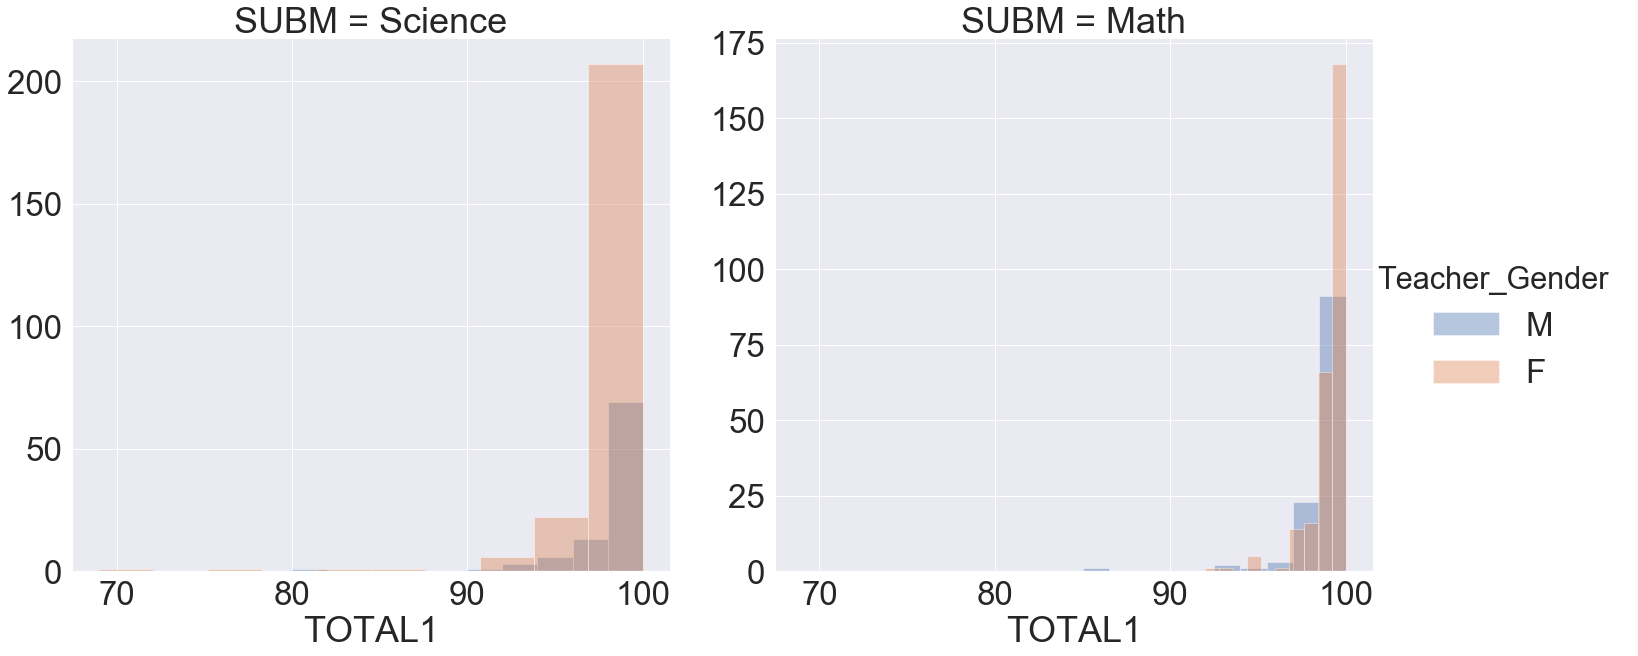

In [260]:
#.  df[df.NAT_MARK>70]
sns.set(font_scale=3)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df[df.NAT_MARK>70], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10 , sharey=False)
g.map(sns.distplot, "TOTAL1", bins=10, kde=0) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()


In [261]:
df[df.NAT_MARK>=70].groupby("Teacher_Gender").TOTAL1.agg(["mean", "max","min","std", "count"])

,mean,max,min,std,count
Teacher_Gender,,,,,
F,98.796477,100.0,69.0,2.465779,511
M,98.593458,100.0,80.0,2.355326,214


In [262]:
df.shape

(24172, 18)

## مقارنة نتائج الطلبة في الفصل الثاني في ضوء نتائج الاختبارات الوطنية

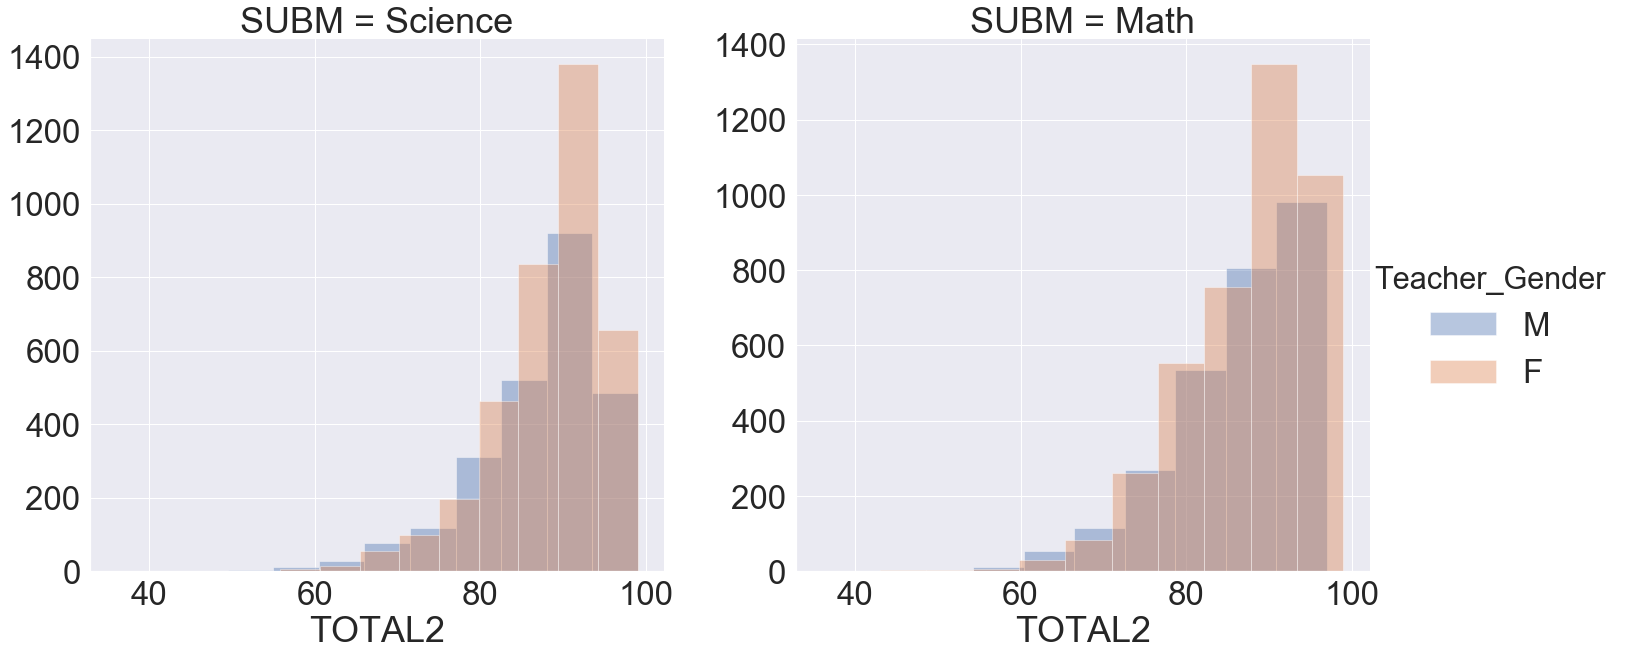

In [73]:
#.  df[df.NAT_MARK   70
sns.set(font_scale=3)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df[df.NAT_MARK>50], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10 , sharey=False)
g.map(sns.distplot, "TOTAL2", bins=10, kde=0) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
# g.map(sns.distplot, "NAT_MARK")
g.add_legend()
plt.show()


In [74]:
df[df.NAT_MARK>=70].groupby("Teacher_Gender").TOTAL2.agg(["mean", "max","min","std", "count"])

,mean,max,min,std,count
Teacher_Gender,,,,,
F,96.029354,99,71,2.281451,511
M,95.808411,99,86,1.671558,214


In [263]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)         
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=BIGGER_SIZE)   
plt.rc('xtick', labelsize=MEDIUM_SIZE)  
plt.rc('ytick', labelsize=MEDIUM_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)   
plt.rc('figure', titlesize=BIGGER_SIZE) 

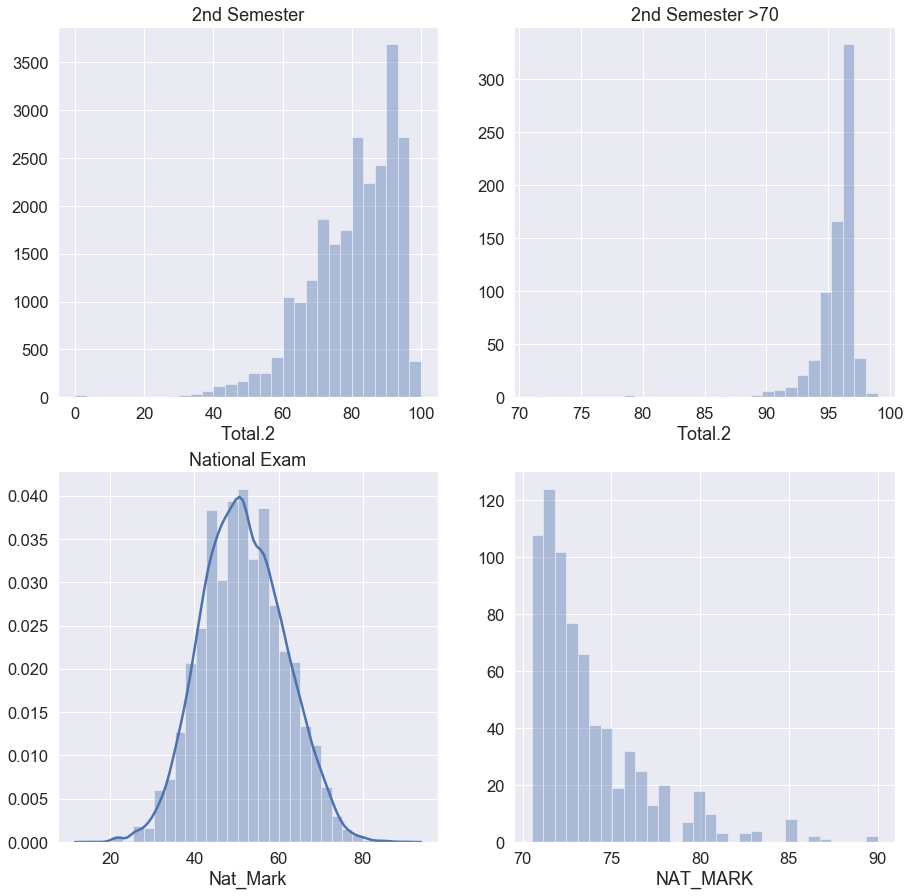

In [264]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
fig, ax=plt.subplots( 2, 2, figsize=(15,15), sharey=False, )
ax[0,0]=sns.distplot( df['TOTAL2'],kde=0, bins=30,  ax=ax[0,0])
ax[0,0].set(title="2nd Semester", xlabel="Total.2")
# ax[0,0].legend(loc="upper left", title="2nd Semester", title_fontsize="x-large")
ax[1,0]=sns.distplot( df[df.NAT_MARK>0].NAT_MARK, bins=30, ax=ax[1,0])
ax[1,0].set(title="National Exam", xlabel="Nat_Mark", ylabel="")
# ax[1,0].legend(loc="upper right", title="National Exam", title_fontsize="x-large")

ax[0,1]=sns.distplot( df[df.NAT_MARK>70]['TOTAL2'],kde=0, bins=30,  ax=ax[0,1])
ax[0,1].set(title="2nd Semester >70", xlabel="Total.2", )
# ax[0,1].legend(loc="upper left", title="2nd Semester", title_fontsize="x-large")
ax[1,1]=sns.distplot( df[df.NAT_MARK>70].NAT_MARK,kde=0,  bins=30, ax=ax[1,1])
# ax[1,0].set(title="National Exam", xlabel="Nat_Mark", ylabel="")
# ax[1,1].legend(loc="upper right", title="National Exam >70", title_fontsize="x-large")

plt.show()

# احصائيات عن الطلبة الحاصلين على صفر في الامتحانات الوطنية

In [265]:
df[df.NAT_MARK==0].groupby(["Teacher_Gender"]).size()

Teacher_Gender
F     54
M    128
dtype: int64

In [266]:
df[df.NAT_MARK==0].groupby([ "PROV_NM"]).size()

PROV_NM
Cap        26
Muharaq    50
North      56
South      50
dtype: int64

In [267]:
df[df.NAT_MARK==0].groupby(["Teacher_Gender", "PROV_NM"]).size()

Teacher_Gender  PROV_NM
F               Cap         9
                Muharaq    20
                North      13
                South      12
M               Cap        17
                Muharaq    30
                North      43
                South      38
dtype: int64

In [268]:
df[(df.NAT_MARK==0) & (df.TOTAL2>70)].groupby("Teacher_Gender").size()

Teacher_Gender
F    32
M    25
dtype: int64

In [269]:
df[(df.NAT_MARK==0) & (df.TOTAL1>70)].groupby("Teacher_Gender").size()

Teacher_Gender
F    43
M    30
dtype: int64

No handles with labels found to put in legend.


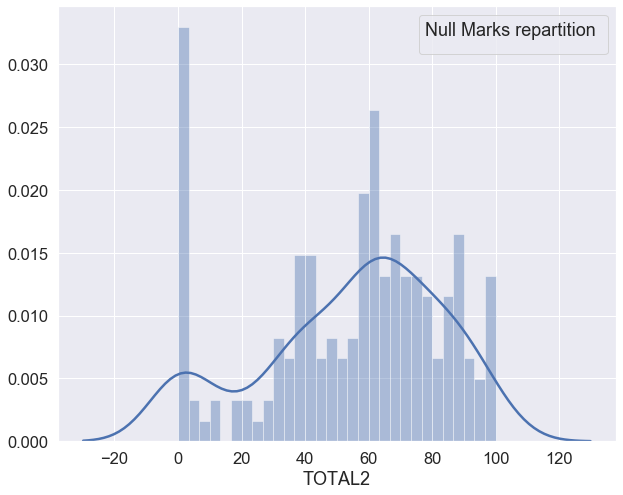

In [270]:
plt.figure(figsize=(10,8))
sns.distplot( df[df.NAT_MARK==0]['TOTAL2'],kde=1, bins=30)
plt.legend(loc="upper right", title="Null Marks repartition ")

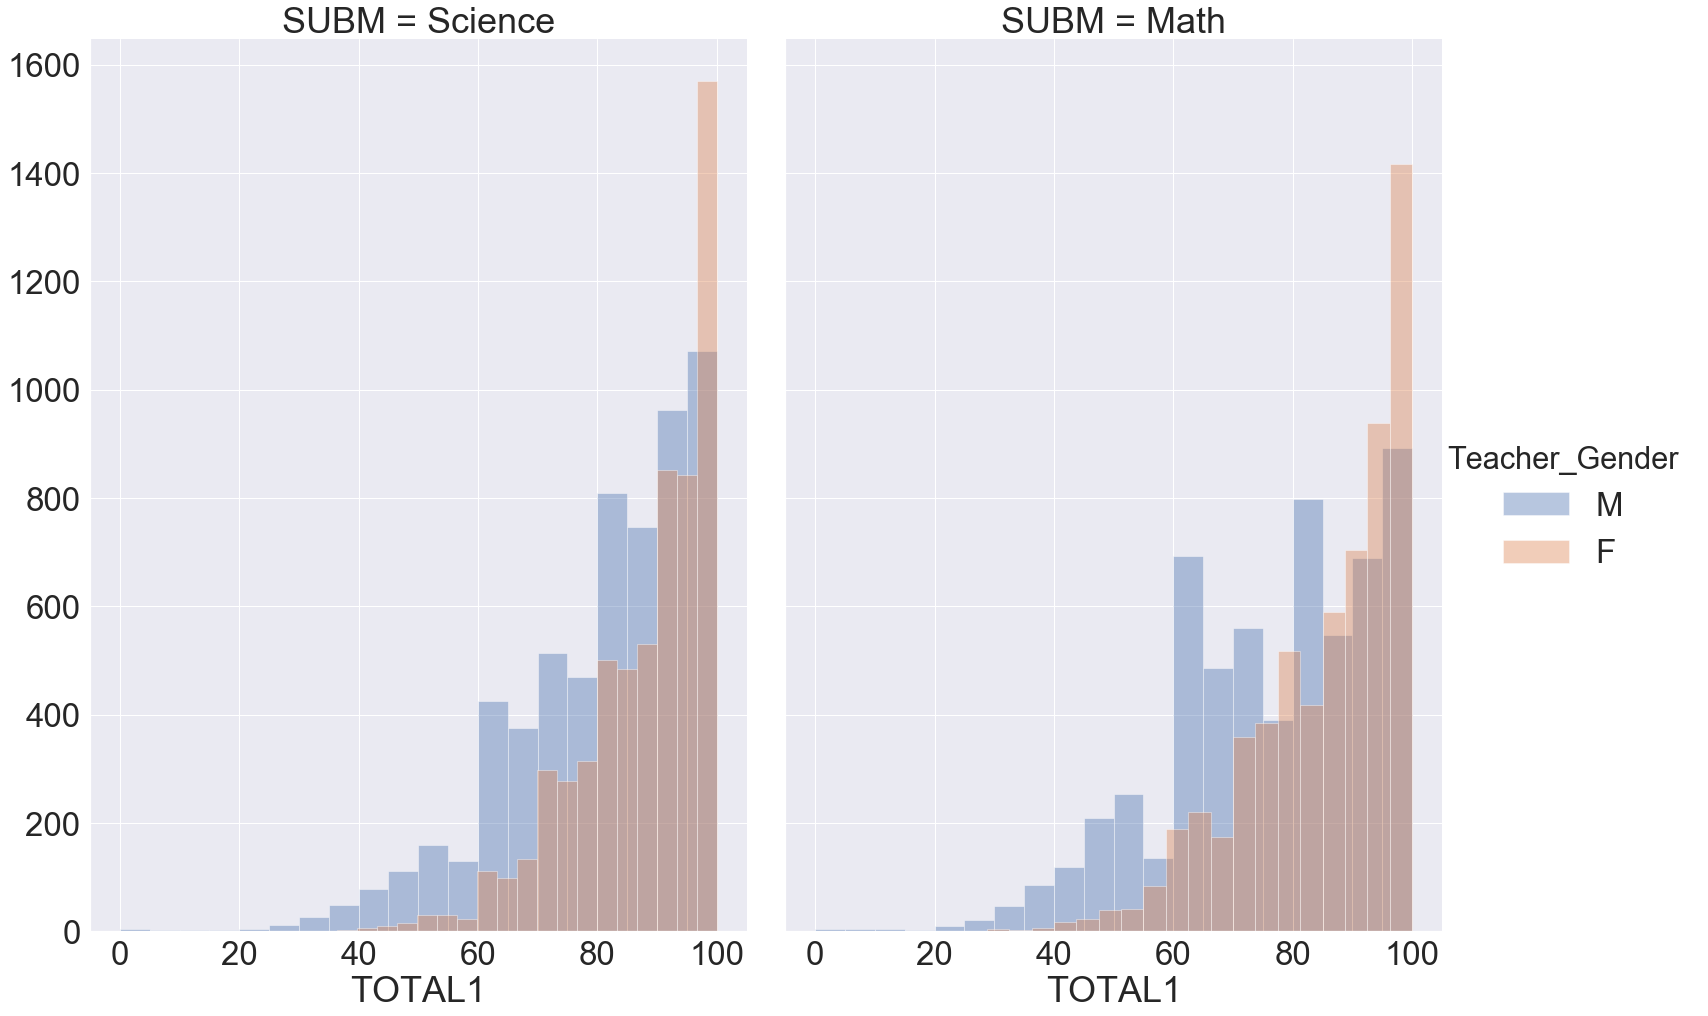

In [271]:
sns.set(font_scale=3)
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=.7, height=15)
g.map(sns.distplot, "TOTAL1", bins=20, kde=0)
g.add_legend()

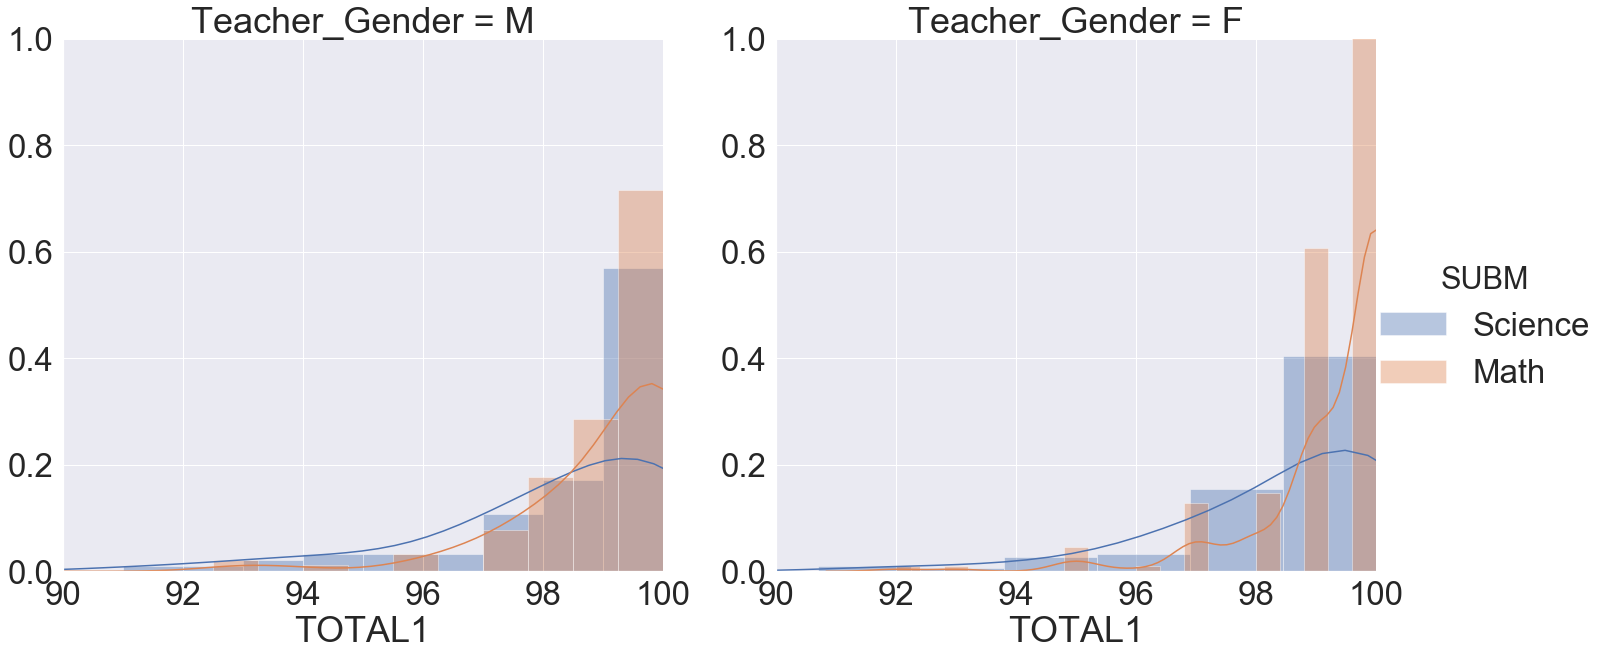

In [272]:
g=sns.FacetGrid(df[df.NAT_MARK>70], hue="SUBM", col="Teacher_Gender", aspect=1,  height=10, sharey=False)
g.map(sns.distplot, "TOTAL1", bins=20)
g.set(xlim=(90, 100), ylim=(0, 1))
g.add_legend()
plt.show()

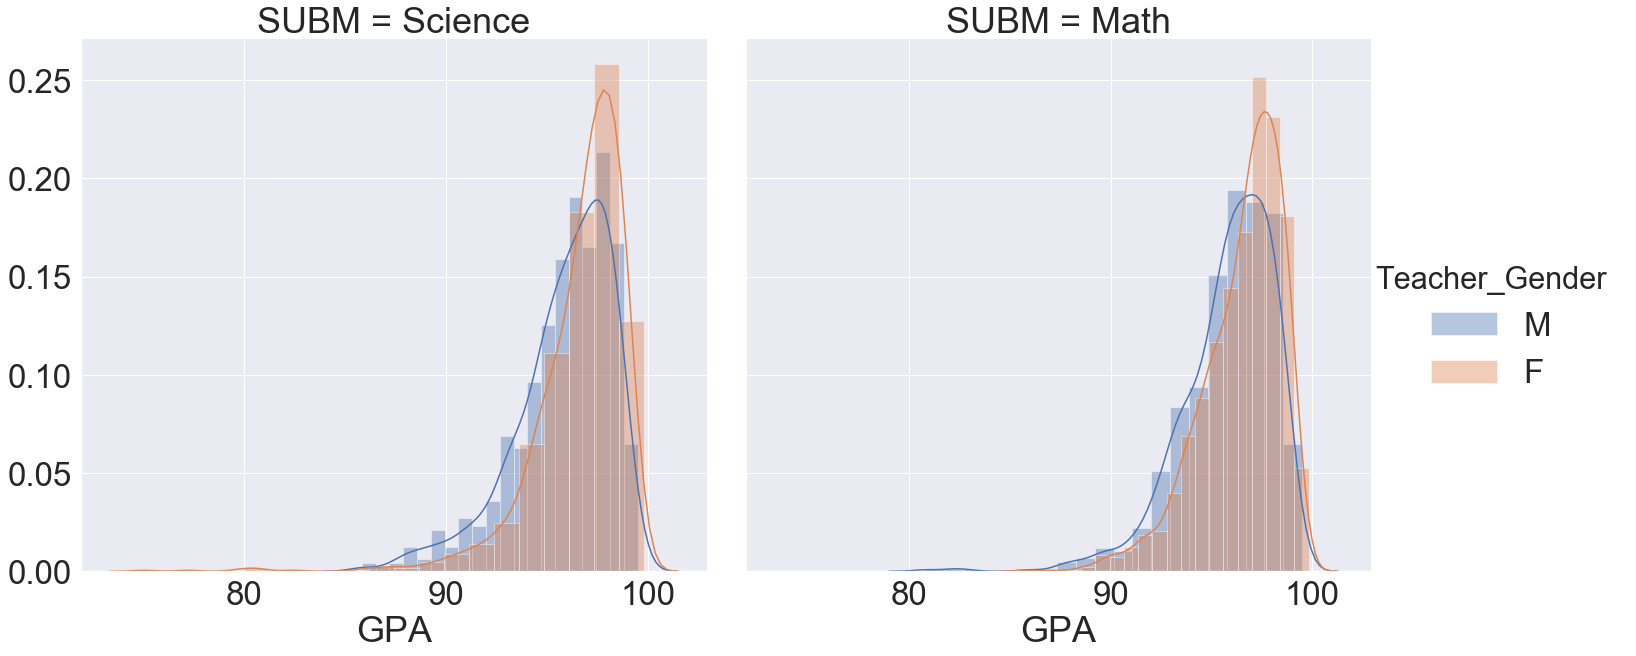

In [273]:
g=sns.FacetGrid(df[df.NAT_MARK>60], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10)
g.map(sns.distplot, "GPA", bins=20)
g.add_legend()

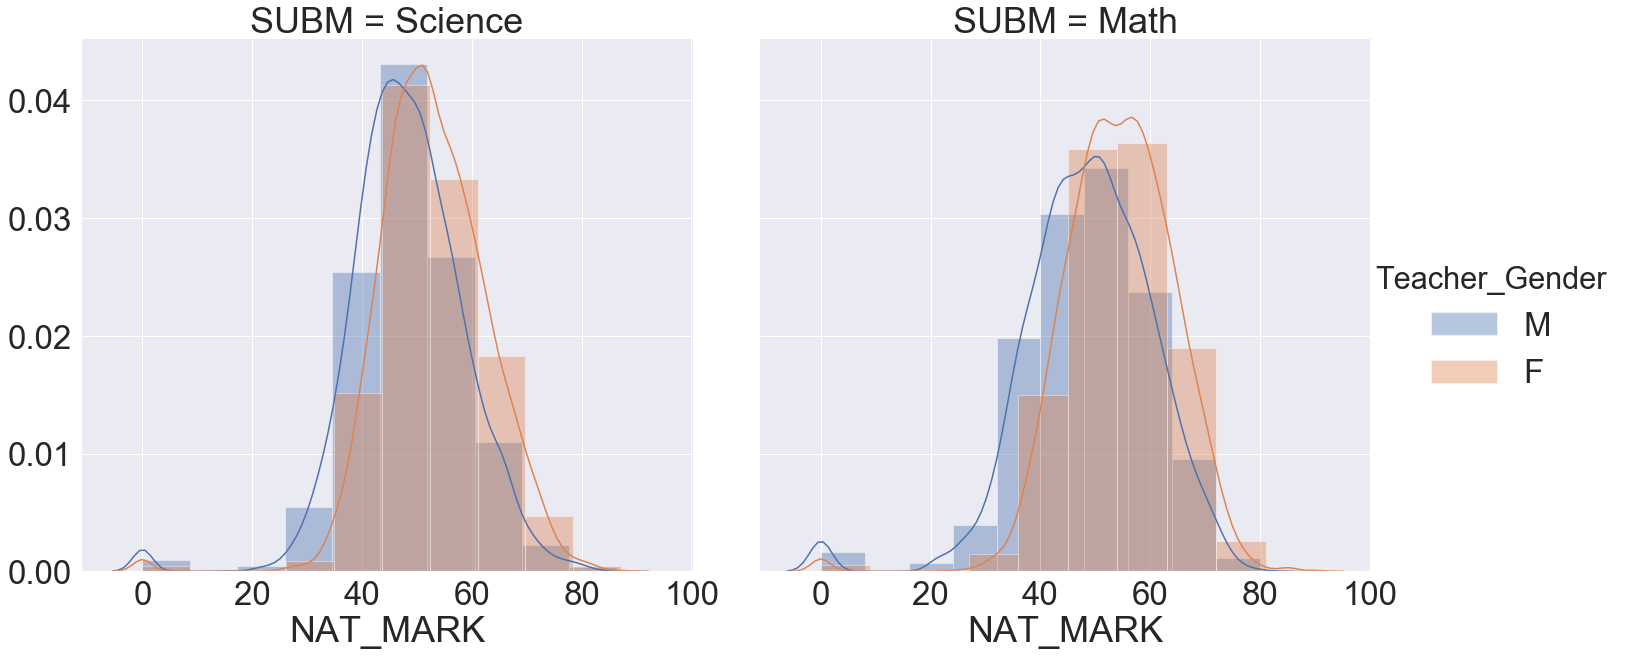

In [274]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=1,  height=10)
g.map(sns.distplot, "NAT_MARK", bins=10)
g.add_legend()

In [275]:
df.PROV_NM.value_counts().index

Index(['North', 'South', 'Muharaq', 'Cap'], dtype='object')

In [276]:
df[df.GPA>75].SUBM.count()

23390

#  توزيع  نتائج الاختبارات الوطنية في ضوء النتائج النهائية 

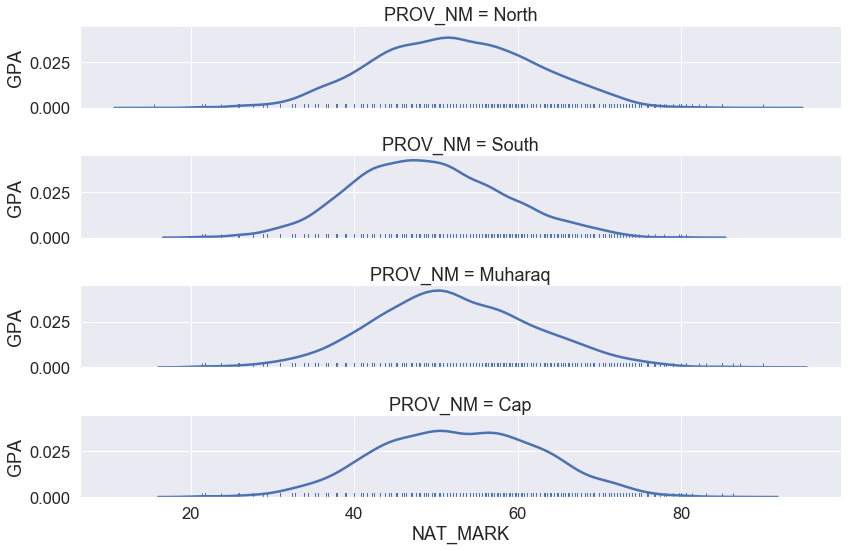

In [286]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df[df.NAT_MARK>0], row="PROV_NM",row_order=province,  height=2,  aspect=6)
g.map(sns.distplot, "NAT_MARK", "GPA", hist=False, rug=True, kde=1)
# A revoire ugent

##  توزيع  نتائج نهائي الفصل الأول في ضوء نهائي الفصل الثاني 

/Users/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


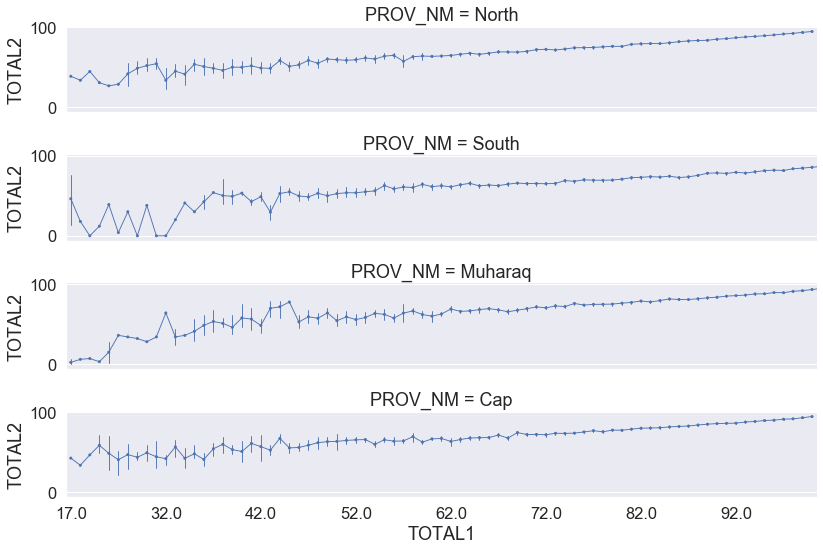

In [287]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": .5})


province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df, row="PROV_NM",row_order=province,  height=2,  aspect=6)
g.map(sns.pointplot, "TOTAL1", "TOTAL2", hist=False, rug=True)
locs, labels=plt.xticks()
g.set(xticks=locs[0::10], xticklabels=labels[0::10])
plt.show()

## جدول الارتباطات فيما بين المتغيرات

أهمية الفصل الأول

In [ ]:
sns.heatmap(df[['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK']], 
            xticklabels=df.columns,
            yticklabels=df.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
from sklearn.feature_selection import RFE, RFECV


In [288]:
df[['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK']].corr(method ='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))
# kendall
# The importance of  Fst Term Result,    اهمية نتيجة الفصل الأول  

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK
ACHIEVEMENTS1,1.0,0.71,0.61,0.57,0.53,0.51,0.69,0.63,0.69,0.51
ACHIEVEMENTS2,0.71,1.0,0.52,0.6,0.48,0.51,0.58,0.69,0.66,0.5
MIDTERM1,0.61,0.52,1.0,0.68,0.72,0.67,0.85,0.73,0.83,0.62
MIDTERM2,0.57,0.6,0.68,1.0,0.66,0.7,0.73,0.86,0.82,0.61
FINAL1,0.53,0.48,0.72,0.66,1.0,0.77,0.97,0.78,0.92,0.66
FINAL2,0.51,0.51,0.67,0.7,0.77,1.0,0.79,0.95,0.9,0.7
TOTAL1,0.69,0.58,0.85,0.73,0.97,0.79,1.0,0.83,0.96,0.7
TOTAL2,0.63,0.69,0.73,0.86,0.78,0.95,0.83,1.0,0.95,0.73
D_MARK,0.69,0.66,0.83,0.82,0.92,0.9,0.96,0.95,1.0,0.74
NAT_MARK,0.51,0.5,0.62,0.61,0.66,0.7,0.7,0.73,0.74,1.0


In [1]:
df.head()

NameError: name 'df' is not defined

In [ ]:
sns.pairplot(df, vars=['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'])
plt.show()

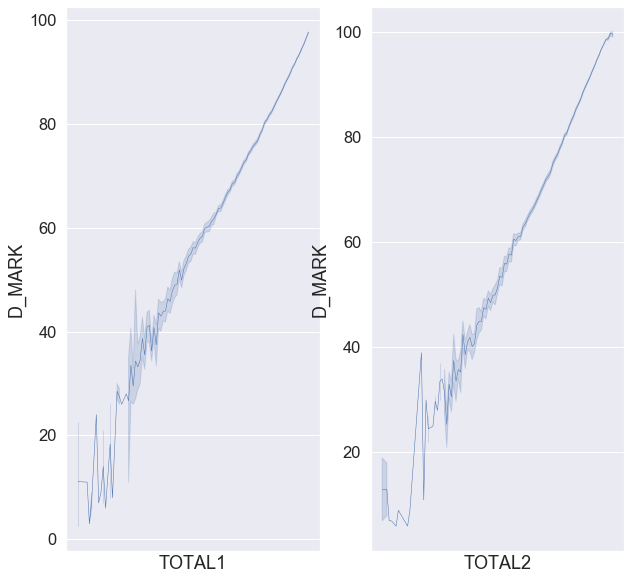

In [289]:
fig, ax=plt.subplots( 1, 2, figsize=(10,10), sharey=False)
ax[0]=sns.lineplot(x="TOTAL1", y="D_MARK", data=df[df.D_MARK.notnull()], ax=ax[0])
ax[1]=sns.lineplot(x="TOTAL2", y="D_MARK", data=df[df.D_MARK.notnull()], ax=ax[1])
locs, labels=plt.xticks()
ax[0].set(xticks=locs[0::10], xticklabels=labels[0::10])
ax[1].set(xticks=locs[0::10], xticklabels=labels[0::10])

plt.show()

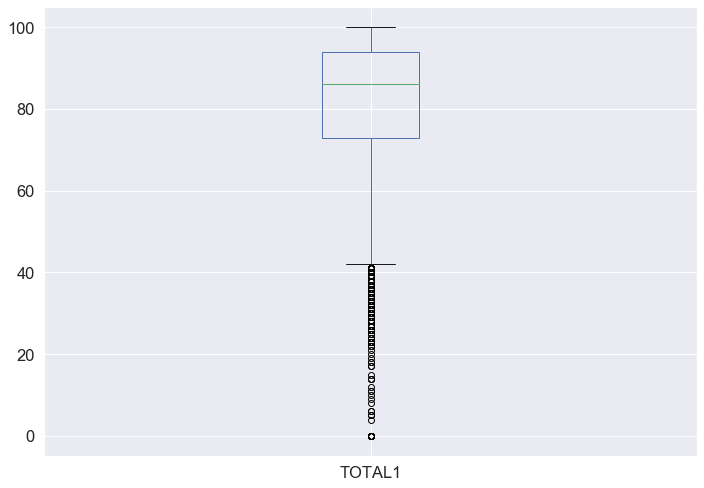

In [291]:
df.TOTAL1.plot(kind="box")
# how dispkay quartiles to put the threshod for outliers

In [292]:
# g=sns.FacetGrid(df[df.NAT_MARK>0], hue="PROV_NM",palette="Set1",  height=5,  hue_kws={"marker":["^", "v"]})
# g.map(plt.scatter, "NAT_MARK", "GPA", s=50, edgecolor="white")
# g.add_legend();

In [293]:
df["ACHIEVEMENTS1"].isnull().sum()

df.isnull().sum()

CPR_NO            0
SCH_NM            0
PROV_NM           0
SUBM              0
Teacher_Gender    0
                 ..
D_MARK            0
NAT_MARK          0
GPA               0
GPA_class         0
NAT_class         0
Length: 18, dtype: int64

In [294]:

for i in df:
    sum(pd.isnull(df[i]))

In [101]:
 %%timeit
 df.isnull().any().any()

8.42 ms ± 997 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [102]:
df.shape

(24190, 16)

In [103]:
df.shape

(24190, 16)

In [295]:
df.isnull().sum(axis=0)

CPR_NO            0
SCH_NM            0
PROV_NM           0
SUBM              0
Teacher_Gender    0
                 ..
D_MARK            0
NAT_MARK          0
GPA               0
GPA_class         0
NAT_class         0
Length: 18, dtype: int64

In [104]:
df=df.dropna()

df[df.isnull().any(axis=1)]

df.isnull().sum(axis=0)

df.ACHIEVEMENTS1.isnull().sum()

0

In [296]:
df.PROV_NM.unique()

array(['Cap', 'North', 'South', 'Muharaq'], dtype=object)

In [301]:
# التقويم  حسب الفصول

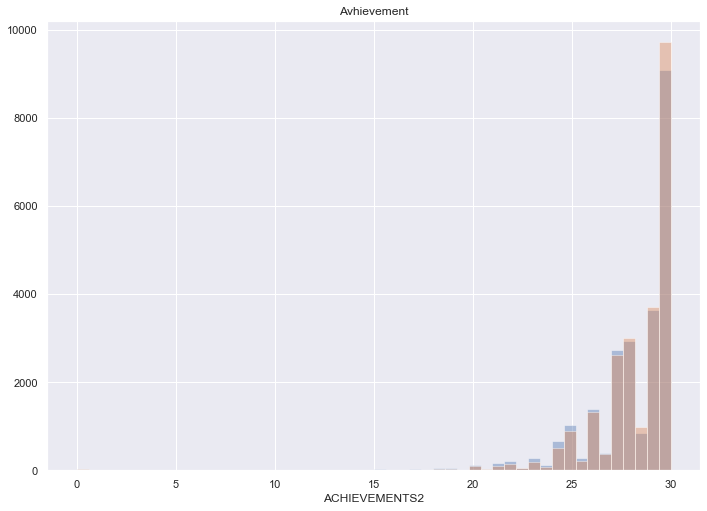

In [297]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df["ACHIEVEMENTS1"], bins=50, kde=0)
sns.distplot(df["ACHIEVEMENTS2"],  bins=50, kde=0)
plt.title("Avhievement")
plt.show()
# it looks like a copy and Paste game.  . نظرة على حالة الستاتيكا. سنوات تنسخ بعضها
# change bins from 20 to 50 to even more and lok at the trend which is wierdrly copied

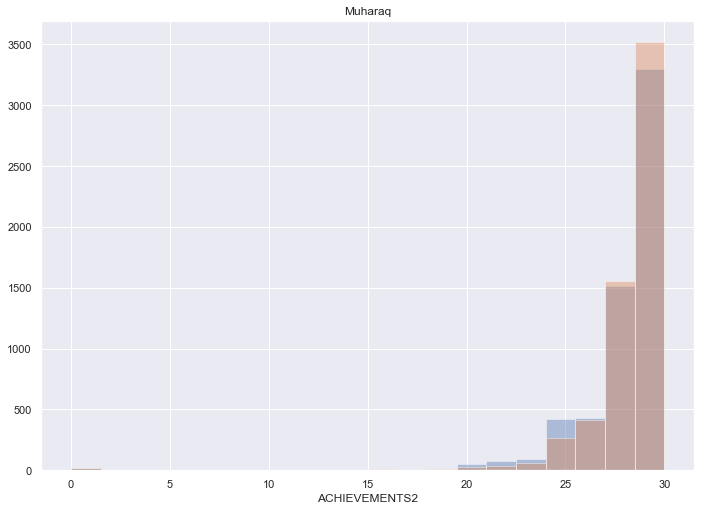

In [299]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df[df.PROV_NM=="South"]["ACHIEVEMENTS1"], bins=20, kde=0)
sns.distplot(df[df.PROV_NM=="South"]["ACHIEVEMENTS2"],  bins=20, kde=0)
plt.title("Muharaq")
plt.show()
# PLot by Province

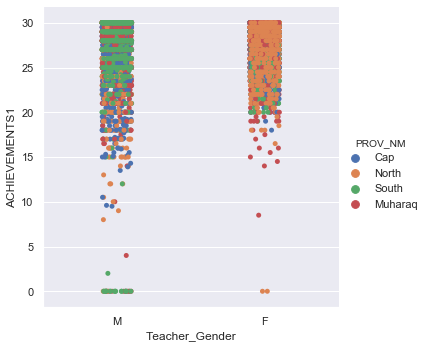

In [306]:
# sns.set(rc={'figure.figsize':(20,12)})  #  to move to   Gender graphs
sns.catplot('Teacher_Gender', 'ACHIEVEMENTS1' , hue="PROV_NM" , data=df)
plt.show()
# it looks like a copy and Paste game. 
# change bins from 20 to 50 to even more and lok at the trend which is wierdrly copied

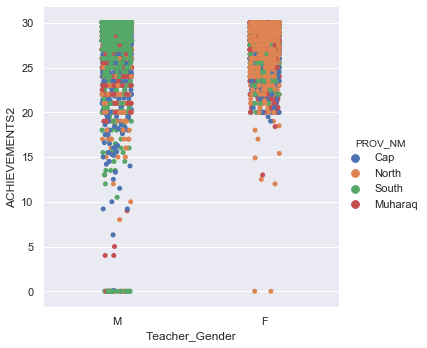

In [303]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot('Teacher_Gender', 'ACHIEVEMENTS2' , hue="PROV_NM" , data=df)
plt.show()
# it looks like a copy and Paste game. 
# change bins from 20 to 50 to even more and lok at the trend which is wierdrly copied

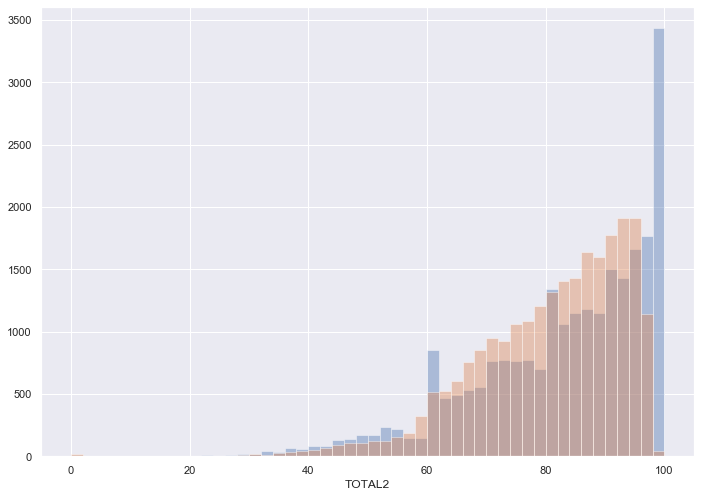

In [304]:
sns.distplot(df["TOTAL1"], kde=False, bins=50)
sns.distplot(df["TOTAL2"], kde=False, bins=50)

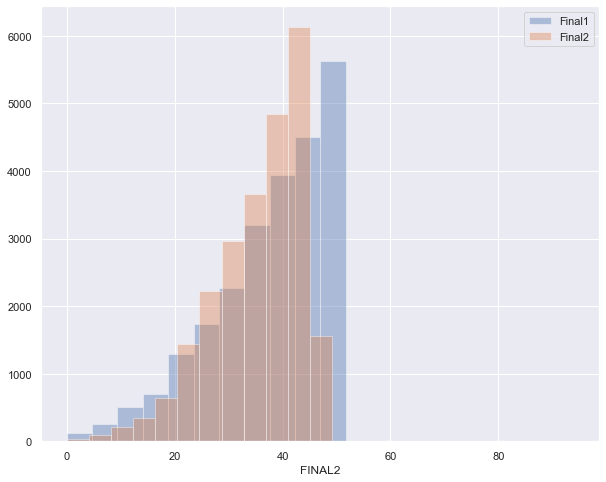

In [305]:
plt.figure(figsize=(10,8))
sns.distplot(df["FINAL1"], kde=False, bins=20, label="Final1")
sns.distplot(df["FINAL2"], kde=False, bins=20, label="Final2")
plt.legend()
plt.show()

In [307]:
df.FINAL1.isnull().sum()

0

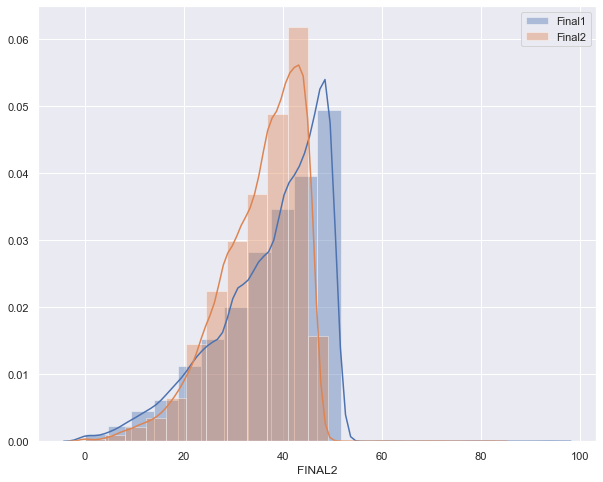

In [308]:
plt.figure(figsize=(10,8))
sns.distplot(df["FINAL1"], bins=20, label="Final1")
sns.distplot(df["FINAL2"], bins=20, label="Final2")
plt.legend()
plt.show()

In [310]:
df.groupby("PROV_NM").FINAL1.agg(["mean", "std", "median", "max"])


,mean,std,median,max
PROV_NM,,,,
Cap,38.603327,10.085207,41.0,50.0
Muharaq,39.799187,9.739846,42.5,50.0
North,38.110444,10.086212,40.5,94.0
South,34.108505,11.602704,36.0,62.0


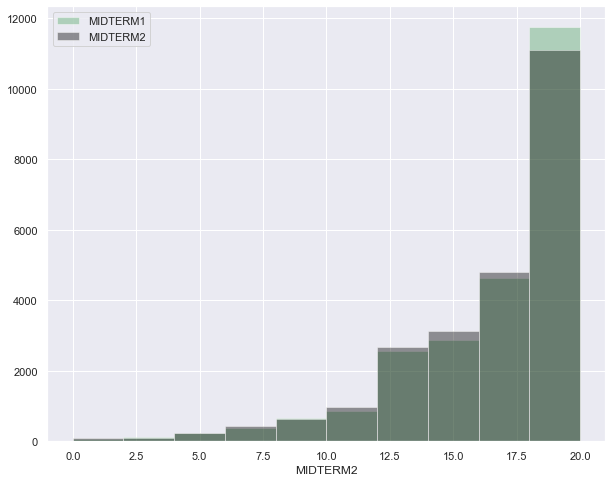

In [553]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.distplot(df["MIDTERM1"], kde=False, bins=10 , label="MIDTERM1", ax=ax, color="g")
ax= sns.distplot(df["MIDTERM2"], kde=False, bins=10,  label="MIDTERM2", ax=ax, color="black")
plt.legend()
plt.show()

In [312]:
df.SUBM.count()

24172

In [313]:
df.groupby('SUBM').size()

SUBM
Math       12086
Science    12086
dtype: int64

In [314]:
df.groupby(["SUBM", "Teacher_Gender"]).size()

SUBM     Teacher_Gender
Math     F                 6130
         M                 5956
Science  F                 6130
         M                 5956
dtype: int64

In [128]:
#fig, ax = plt.subplots(1,2)
#sns.distplot(df["ACHIEVEMENTS2"], kde=False, bins=50)
# it looks like a copy and Paste game. 
# change bins from 20 to 50 tddo even more and lok at the trend which is wierdrly copied

# مقارنة نتائج السنة الدراسية بنتائج الامتحان الوطني  حسب مجموعات 

In [456]:
bins = [0, 60, 70, 80, 90, 100]

In [545]:
d=df.groupby(
pd.cut( 
    df["GPA"], bins
    )
).size()
d=pd.DataFrame({"interval":d.index, "GPA":d.array, "NAT_MARK":df.groupby(
pd.cut( 
    df["NAT_MARK"], bins
    )
).size().array})

No handles with labels found to put in legend.


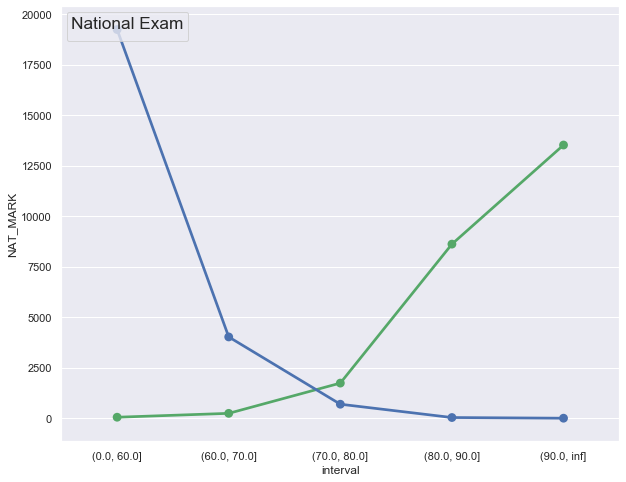

In [588]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.pointplot("interval", "GPA",     data=d, color="g" , ax=ax )
ax=sns.pointplot("interval","NAT_MARK" ,data=d,  color="b", ax=ax)
ax.legend(loc="upper left", title="National Exam",  title_fontsize="x-large")

plt.show()


In [455]:
df.shape

(24172, 18)

In [460]:
bins = [0, 60, 70, 80, 90, np.inf]
names = ['<60', '60-70', '70-80', '80-90', '>90']
d = dict(enumerate(names, 1))
d

{1: '<60', 2: '60-70', 3: '70-80', 4: '80-90', 5: '>90'}

In [509]:
bins = [0, 60, 70, 80, 90, np.inf]
names = ['<60', '60-70', '70-80', '80-90', '>90']
d = dict(enumerate(names, 1))

df['GPA_class'] = np.vectorize(d.get)(np.digitize(df['GPA'], bins))
df['NAT_class'] = np.vectorize(d.get)(np.digitize(df['NAT_MARK'], bins))


# df['GPA_class'] = pd.cut(df['GPA'], bins, labels=names)
# df['NAT_class'] = pd.cut(df['NAT_MARK'], bins, labels=names)

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


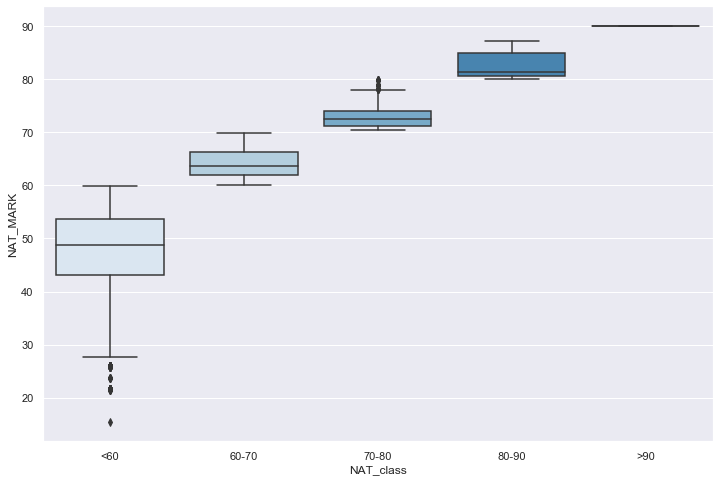

In [592]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df[df.NAT_MARK>0]["NAT_MARK"], x=df[df.NAT_MARK>0].NAT_class, order=["<60", "60-70", "70-80", "80-90", ">90"], palette="Blues")
plt.show()

In [463]:
df[df.NAT_MARK==90]["NAT_MARK"].value_counts()

90.0    2
Name: NAT_MARK, dtype: int64

In [464]:
df[df.NAT_MARK>0].groupby(["PROV_NM"]).size()


PROV_NM
Cap        4934
Muharaq    4992
North      8188
South      5876
dtype: int64

In [465]:
df[df.NAT_MARK>80].groupby(["PROV_NM"]).agg({"PROV_NM":"size"})

,PROV_NM
PROV_NM,
Cap,7
Muharaq,13
North,12
South,1


In [466]:
df.NAT_MARK.max()

90.0

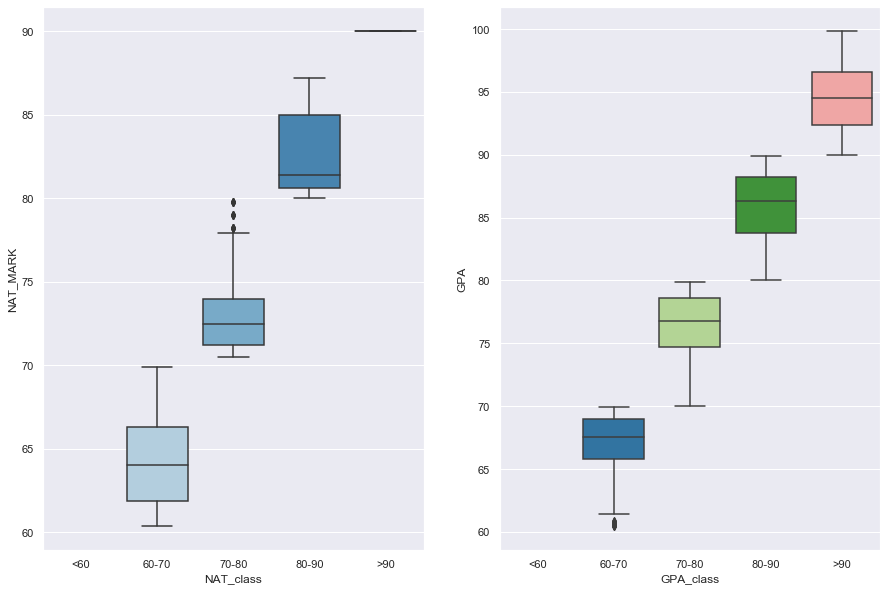

<Figure size 864x576 with 0 Axes>

In [595]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,10))
plt.figure(figsize=(12,8))
sns.boxplot(y=df[df.NAT_MARK>60]["NAT_MARK"], x=df[df.NAT_MARK>60].NAT_class, order=["<60", "60-70", "70-80", "80-90", ">90"], palette="Blues", ax=ax1)
sns.boxplot(y=df[df.GPA>60]["GPA"], x=df[df.GPA>60].GPA_class, order=["<60", "60-70", "70-80", "80-90", ">90"], ax=ax2)
plt.show()

In [633]:
df[df.NAT_MARK>0].groupby("NAT_class").NAT_MARK.agg(["median" ])
#b= df[df.NAT_MARK>0].groupby("NAT_class").NAT_MARK.agg(["median"])

pd.concat( [ df[df.NAT_MARK>0].groupby("NAT_class").NAT_MARK.agg(["median", "count" ]), 
         df[df.NAT_MARK>0].groupby("GPA_class").GPA.agg(["median", "count"])], axis=1)

,median,count,median,count
60-70,63.6,4148,67.600000,209
70-80,72.5,682,76.818182,1689
80-90,81.4,41,86.333333,8454
<60,48.8,19117,57.600000,14
>90,90.0,2,94.500000,13624


In [635]:
df[df.NAT_MARK>0].groupby(["NAT_class", "GPA_class"]).NAT_MARK.agg(["median", "count" ])

median  count
NAT_class GPA_class               
60-70     70-80       64.45      2
          80-90       61.90     90
          >90         64.00   4056
70-80     70-80       71.40      1
          80-90       72.10      3
...                     ...    ...
<60       70-80       38.90   1686
          80-90       45.20   8361
          <60         35.20     14
          >90         52.90   8847
>90       >90         90.00      2

[13 rows x 2 columns]

In [619]:
#À vérifier   l'ordre des index
#sns.pointplot( df.NAT_class.unique(), df.groupby("NAT_class").size(), color="green")
#sns.pointplot( df.GPA_class.unique(), df.groupby("GPA_class").size(), color="blue")
plt.show()

In [648]:


pd.concat( [ df.groupby("NAT_class").size(), df.groupby("GPA_class").size()], axis=1)


,0,1
60-70,4148,238
70-80,682,1712
80-90,41,8508
<60,19299,52
>90,2,13662


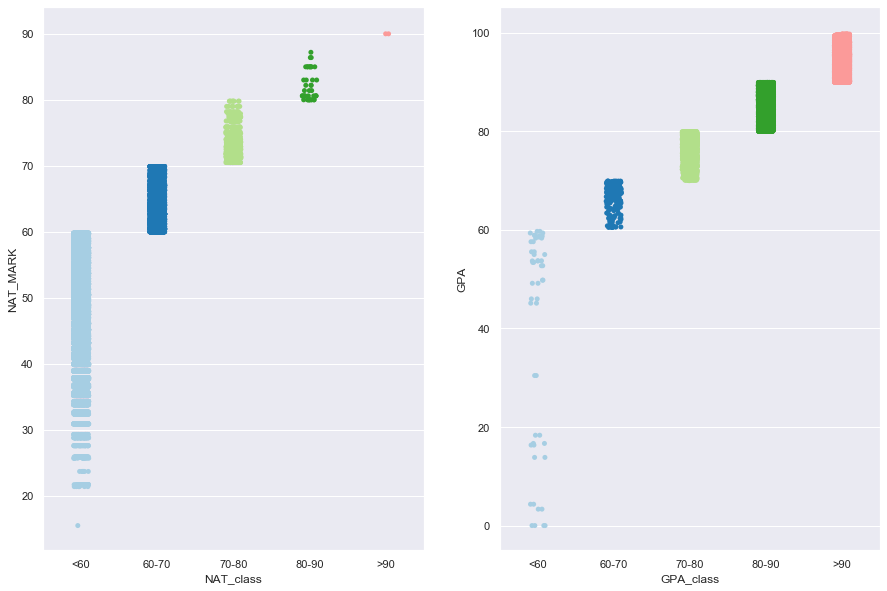

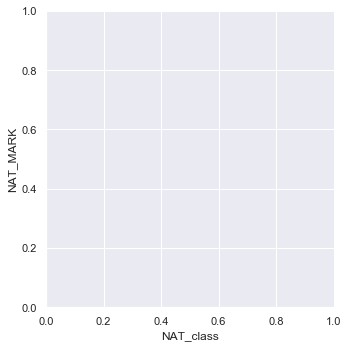

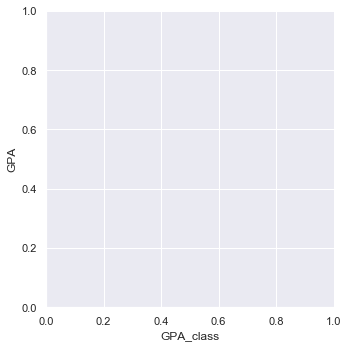

In [624]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,10))
sns.catplot( x="NAT_class", y="NAT_MARK",data=df[df.NAT_MARK>0],order=["<60", "60-70", "70-80", "80-90", ">90"],  ax=ax1)
sns.catplot( x="GPA_class", y="GPA" ,data=df,order=["<60", "60-70", "70-80", "80-90", ">90"],  ax=ax2)
plt.show()

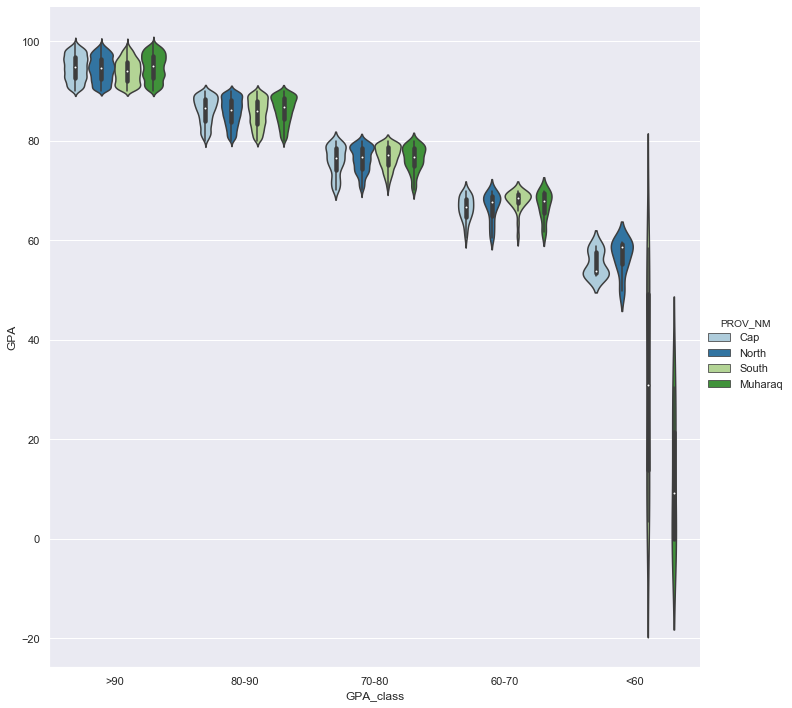

In [486]:
sns.catplot(x="GPA_class", y="GPA" ,data=df, hue="PROV_NM", kind="violin", height=10, aspcet=.7)

In [493]:
df[df.GPA<60].groupby("PROV_NM").GPA.agg(["mean","median"]).round(2)

,mean,median
PROV_NM,,
Cap,55.23,53.70
Muharaq,12.19,9.17
North,56.70,58.55
South,30.69,30.90


In [494]:
df[df.GPA<60].groupby("PROV_NM").NAT_MARK.agg(["mean","median"]).round(2)

,mean,median
PROV_NM,,
Cap,20.13,28.4
Muharaq,0.00,0.0
North,15.49,0.0
South,4.87,0.0


- Note the median positions among all violin polts above. ( median North  twice  Muharaq median)

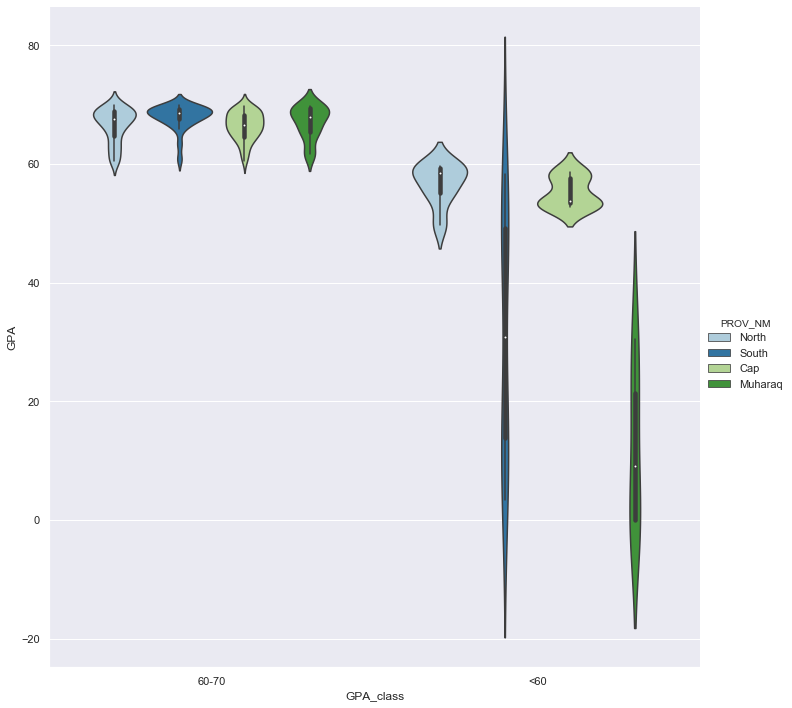

In [508]:
sns.catplot(x="GPA_class", y="GPA" ,data=df[df.GPA<70], hue="PROV_NM", kind="violin", height=10, aspcet=.9)
plt.show()

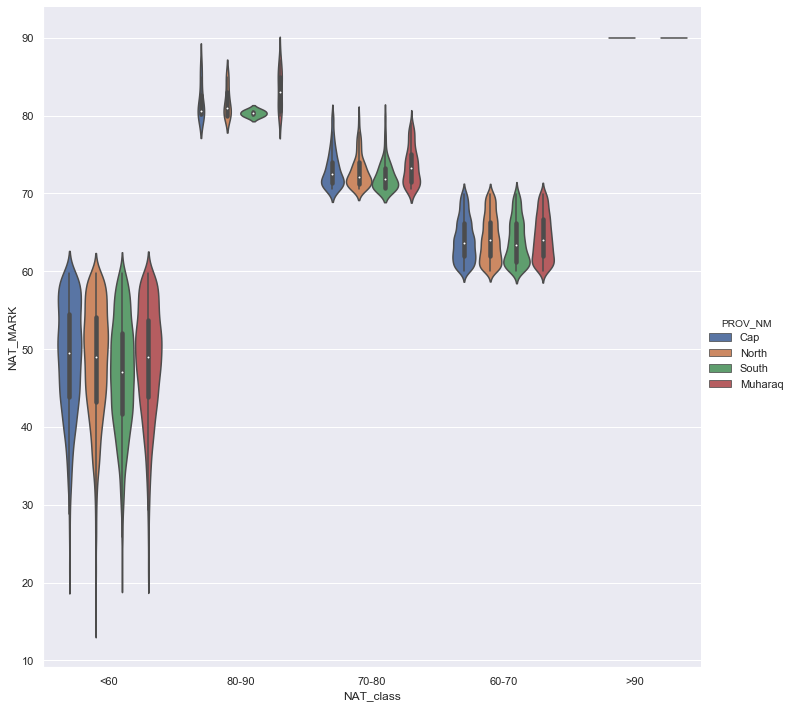

In [287]:
sns.catplot(x="NAT_class", y="NAT_MARK" ,data=df[df.NAT_MARK>0], hue="PROV_NM", kind="violin", height=10, aspcet=.7)
plt.show()

In [288]:
s = pd.Series([1,2,3, np.nan, 5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [289]:

s.value_counts(), s.value_counts(dropna = False)

(5.0    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64, 5.0    1
 NaN    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64)

In [510]:
df['ACHIEVEMENTS1'].value_counts(dropna=False)

30.0    7491
29.0    3602
28.0    2910
27.0    2163
29.5    1542
        ... 
14.3       1
9.6        1
20.6       1
23.2       1
15.9       1
Name: ACHIEVEMENTS1, Length: 128, dtype: int64

In [511]:
df['ACHIEVEMENTS1'].value_counts(dropna=False, bins=5)

(24.0, 30.0]     22457
(18.0, 24.0]      1553
(12.0, 18.0]       117
(-0.031, 6.0]       32
(6.0, 12.0]         13
Name: ACHIEVEMENTS1, dtype: int64

In [512]:
df.FINAL1.value_counts(dropna=False).head()

50.0    1652
49.0    1077
48.0     934
40.0     885
47.0     863
Name: FINAL1, dtype: int64

In [513]:
df.isnull().sum()

CPR_NO            0
SCH_NM            0
PROV_NM           0
SUBM              0
Teacher_Gender    0
                 ..
D_MARK            0
NAT_MARK          0
GPA               0
GPA_class         0
NAT_class         0
Length: 18, dtype: int64

In [514]:
df.ACHIEVEMENTS1.value_counts(normalize=True)

30.0    0.309904
29.0    0.149015
28.0    0.120387
27.0    0.089484
29.5    0.063793
          ...   
14.3    0.000041
9.6     0.000041
20.6    0.000041
23.2    0.000041
15.9    0.000041
Name: ACHIEVEMENTS1, Length: 128, dtype: float64

In [515]:
# dataframe containing only the object columns.
obj_df = df.select_dtypes(include=['object'])  #.copy()
obj_df.head()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,GPA_class,NAT_class
0,المعهد الديني الجعفري,Cap,Science,M,>90,<60
1,المعهد الديني الجعفري,Cap,Science,M,80-90,<60
2,المعهد الديني الجعفري,Cap,Science,M,80-90,<60
3,المعهد الديني الجعفري,Cap,Science,M,80-90,<60
4,المعهد الديني الجعفري,Cap,Science,M,80-90,<60


In [516]:
#clean up  NULL value
df[df.isnull().any(axis=1)]

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,GPA_class,NAT_class


In [517]:
np.count_nonzero(obj_df.isnull())

0

In [518]:
obj_df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

0        0
1        0
2        0
3        0
4        0
        ..
24185    0
24186    0
24187    0
24188    0
24189    0
Length: 24172, dtype: int64

In [519]:
#clean up  NULL value
obj_df[obj_df.isnull().any(axis=1)]

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,GPA_class,NAT_class


In [520]:
obj_df["SCH_NM"].value_counts()

مدرسة الامام الطبرى الابتدائية للبنين            864
مدرسة ابن سينا الابتدائية للبنين                 826
مدرسة مالك بن انس الابتدائية للبنين              804
مدرسة البسيتين الابتدائية للبنين                 626
مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين    522
                                                ... 
مدرسة الجسرة الابتدائية للبنين                    66
مدرسة جو الابتدائية الاعدادية للبنات              66
مدرسة عين جالوت الابتدائية للبنات                 52
مدرسة سكينة بنت الحسين الابتدائية للبنات          36
مدرسة عائشة ام المؤمنين الاعدادية للبنات          34
Name: SCH_NM, Length: 99, dtype: int64

In [13]:
# obj_df = obj_df.fillna({"num_doors": "four"})
# En cas où on veut replacer une valeur par une autre

In [541]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
df_copy=df
data_column_category=make_column_selector(dtype_exclude=np.number)

label_encoder = LabelEncoder()

# for i in data_column_category:
#     df_copy[i] = label_encoder.fit_transform(df_copy[i])

# print("Label Encoded Data: ")

print(data_column_category)

In [141]:
df_copy.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,STUFF_SEX,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,0
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,0
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,0
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,0
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,0


In [17]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [18]:
#df_Encoded = df[df.columns.difference(['B', 'D'])]

In [19]:

# Encoding the variable
obj_df =obj_df.apply(lambda x: d[x.name].fit_transform(x))

In [20]:
obj_df.tail()

,SCH_NM,PROV_NM,SUBM,STUFF_SEX
24185,98,0,0,1
24186,98,0,0,1
24187,98,0,0,1
24188,98,0,0,1
24189,98,0,0,1


In [21]:
df.drop(['SCH_NM','PROV_NM','SUBM', 'STUFF_SEX'], axis=1)

,CPR_NO,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.900000,0
1,71105956,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.500000,0
2,70712190,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.200000,0
3,70207496,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.900000,0
4,70507953,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,70304602,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364,98
24186,71007423,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818,98
24187,70402183,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273,98
24188,70803196,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818,98


In [22]:
pd.concat([df, obj_df])

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ACHIEVEMENTS1,ACHIEVEMENTS2,CPR_NO,D_MARK,FINAL1,FINAL2,GPA,MIDTERM1,MIDTERM2,NAT_MARK,PROV_NM,SCH_NM,SCH__NM,STUFF_SEX,SUBM,TOTAL1,TOTAL2
0,28.0,30.0,70913390.0,85.0,45.0,33.0,92.9,17.0,17.0,53.7,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,90.0,80.0
1,27.0,29.0,71105956.0,83.0,41.5,37.0,89.5,14.0,16.0,49.7,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,83.0,82.0
2,27.0,27.0,70712190.0,74.0,27.5,37.0,86.2,13.0,15.0,52.1,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,68.0,79.0
3,26.0,24.5,70207496.0,77.0,44.0,32.5,89.9,15.0,12.0,52.9,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,85.0,69.0
4,25.0,28.0,70507953.0,76.0,31.5,37.0,86.2,14.0,15.0,52.1,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,71.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN


In [23]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,STUFF_SEX,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,0
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,0
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,0
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,0
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,0


In [65]:
feature_names=(df.iloc[:,7:18]).columns

In [66]:
feature_names

Index(['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

- eta: It is also known as the learning rate or the shrinkage factor. It actually shrinks the feature weights to make the boosting process more conservative. The range is 0 to 1. Low eta value means the model is more robust to overfitting.

- gamma: The range is 0 to ∞. Larger the gamma more conservative the algorithm is.
- max_depth: We can specify maximum depth of a tree using this parameter.
- subsample: It is the proportion of rows that the model will randomly select to grow trees.
- colsample_bytree: It is the ratio of variables randomly chosen to build each tree in the model.

# Skewness

*skewness = 0 : normally distributed.

*skewness > 0 : more weight in the left tail of the distribution.

*skewness < 0 : more weight in the right tail of the distribution

In [190]:
df.iloc[6:16].skew()

CPR_NO          -0.171293
ACHIEVEMENTS1    0.218046
ACHIEVEMENTS2   -1.385865
MIDTERM1        -0.358600
MIDTERM2        -0.935082
                   ...   
TOTAL1           0.077588
TOTAL2          -1.227232
D_MARK          -0.558691
NAT_MARK        -0.171779
GPA             -1.128624
Length: 12, dtype: float64

Let us take a very common example of house prices. Suppose we have house values ranging from $100k to $1,000,000 with the average being $\$500,000$ .
If the peak of the distribution was left of the average value, portraying a positive skewness in the distribution. It would mean that many houses were being sold for less than the average value, i.e. $500k. This could be for many reasons, but we are not going to interpret those reasons here.
If the peak of the distributed data was right of the average value, that would mean a negative skew. This would mean that the houses were being sold for more than the average value.



In [258]:
(df.columns)

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [256]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24172 entries, 0 to 24189
Data columns (total 16 columns):
CPR_NO            24172 non-null int64
SCH_NM            24172 non-null object
PROV_NM           24172 non-null object
SUBM              24172 non-null object
Teacher_Gender    24172 non-null object
ACHIEVEMENTS1     24172 non-null float64
ACHIEVEMENTS2     24172 non-null float64
MIDTERM1          24172 non-null float64
MIDTERM2          24172 non-null float64
FINAL1            24172 non-null float64
FINAL2            24172 non-null float64
TOTAL1            24172 non-null float64
TOTAL2            24172 non-null int64
D_MARK            24172 non-null int64
NAT_MARK          24172 non-null float64
GPA               24172 non-null float64
dtypes: float64(9), int64(3), object(4)
memory usage: 3.8+ MB


# XGBoost  4. GPA

In [356]:
df.columns

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [419]:
# split data into X and y
X = df.iloc[:,5:15]
y = df.iloc[:,15]

In [420]:
X.head()

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK
0,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7
1,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7
2,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1
3,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9
4,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1


In [421]:
y.head()

0    92.9
1    89.5
2    86.2
3    89.9
4    86.2
Name: GPA, dtype: float64

In [422]:
# Split dataset
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.3)

# XGBoost's hyperparameters

In [423]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [424]:
xg_reg.fit(Xtrain,ytrain)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [425]:
preds = xg_reg.predict(Xtest)

In [426]:
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.376791


# k-fold Cross Validation using XGBoost

In [427]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [428]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [429]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,80.617879,0.044406,80.617750,0.096869
1,72.576235,0.040283,72.577843,0.095339
2,65.339900,0.035925,65.341209,0.093741
3,58.826838,0.032364,58.828260,0.092489
4,52.965514,0.028457,52.967107,0.090566


In [430]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.907892
Name: test-rmse-mean, dtype: float64


In [431]:
preds = xg_reg.predict(Xtest)

In [432]:
print(preds)

[57.6176   61.697945 59.34715  ... 54.685207 63.027077 61.364117]


In [433]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [434]:
#!pip install graphviz


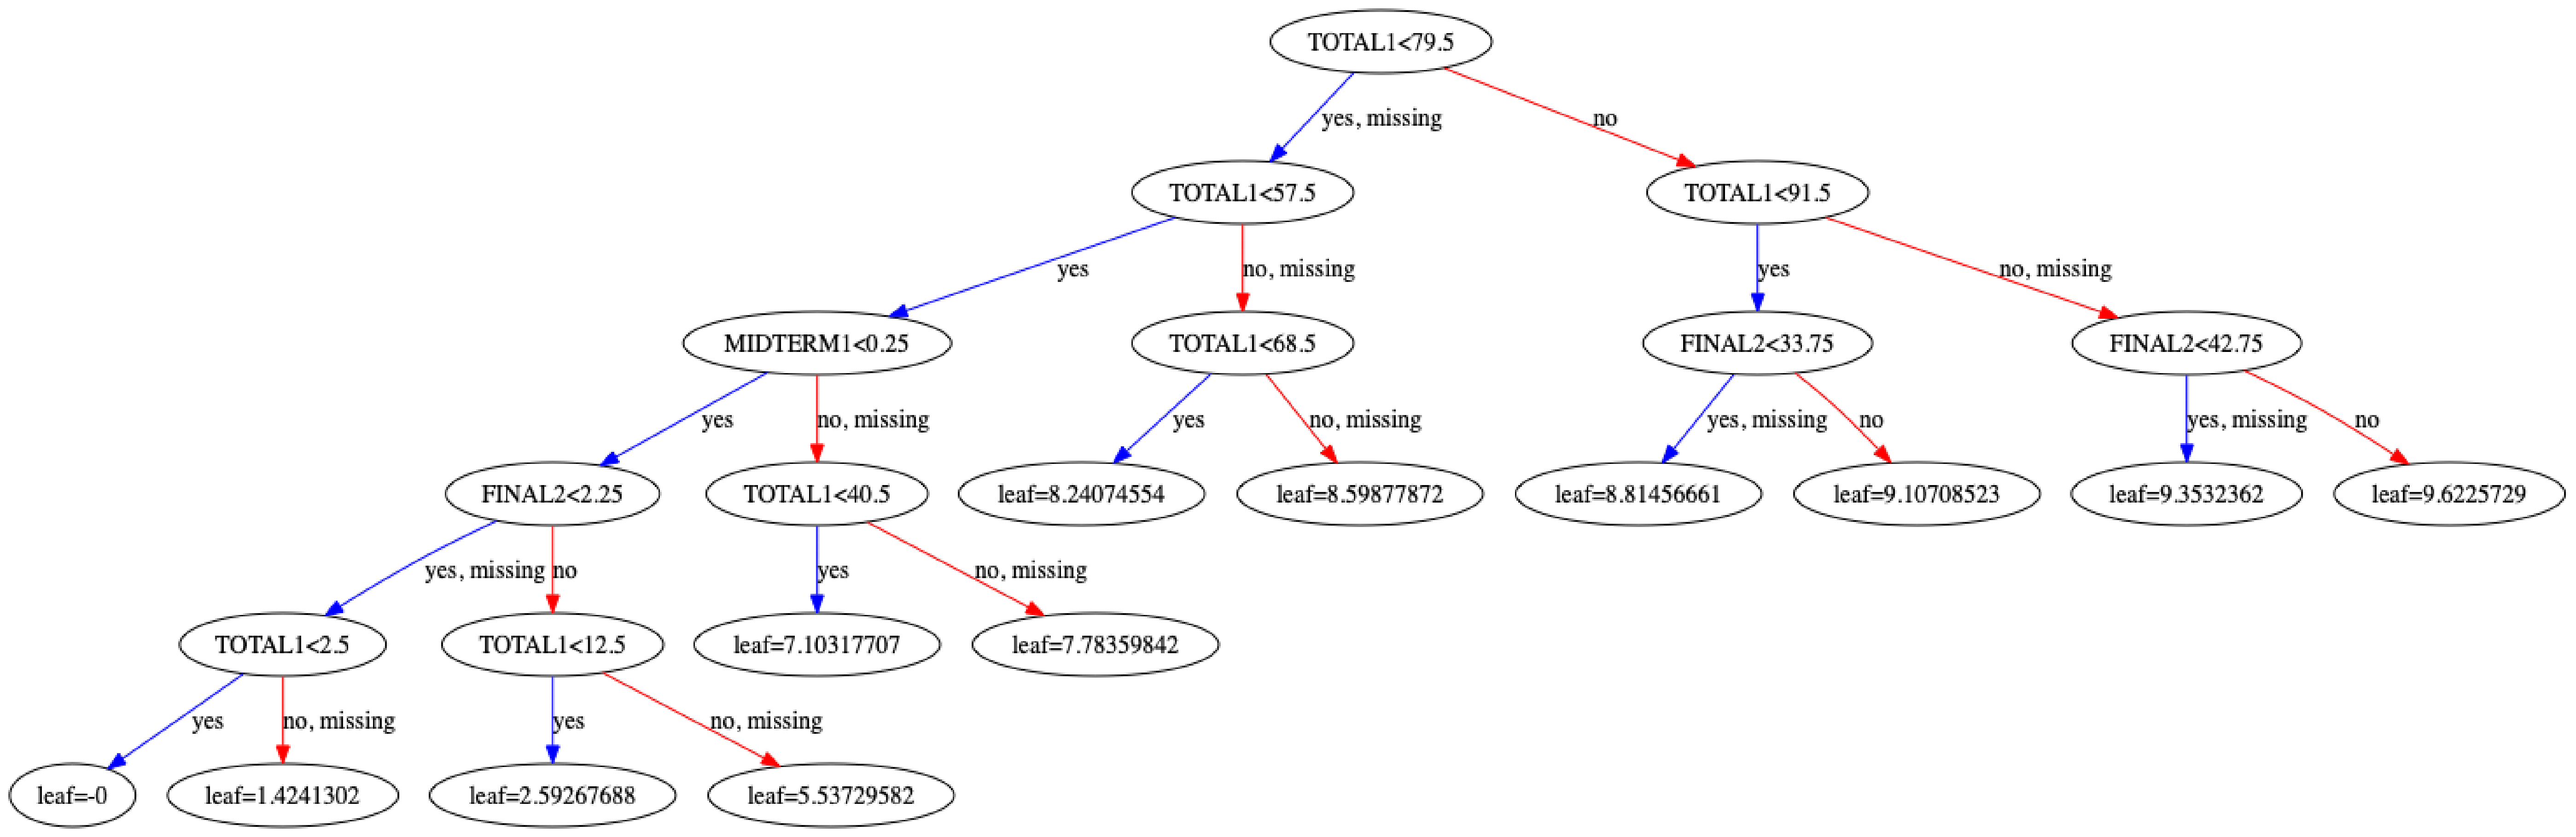

In [435]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [100, 60]


xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

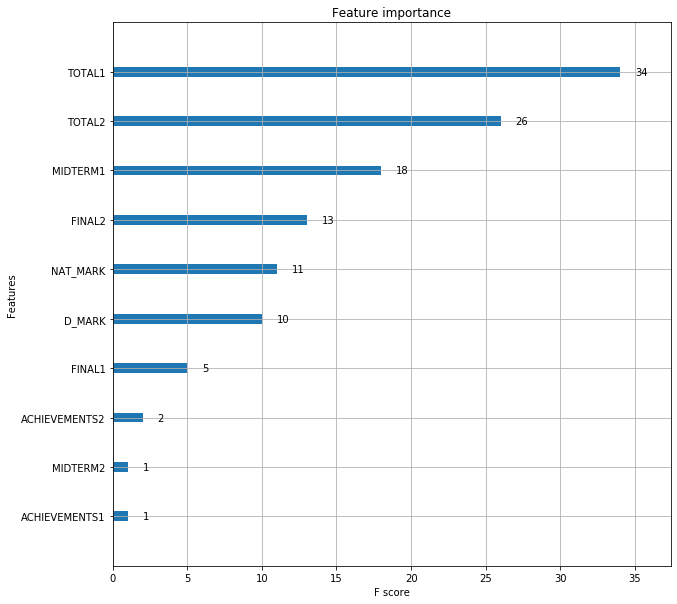

In [436]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xg_reg)
plt.show()

# XGBoost 4 NAT_MARK

In [377]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [2]:
# split data into X and y
X_N = df.loc[:,['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'GPA']]
y_N = df.loc[:,"NAT_MARK"]

NameError: name 'df' is not defined

In [3]:
X_N.head()

NameError: name 'X_N' is not defined

In [388]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_N, y_N, test_size=0.3)

In [450]:
xreg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [451]:
xreg.fit(X_train,y_train)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [453]:
preds_N = xreg.predict(X_test)

In [454]:
rmse = np.sqrt(mean_squared_error(y_test, preds_N))
print("RMSE: %f" % (rmse))

RMSE: 19.150134


In [455]:
d_Mtrix = xgb.DMatrix(data=X_N,label=y_N)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [456]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

c_res = xgb.cv(dtrain=d_Mtrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [457]:
c_res.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,46.708833,0.050753,46.711166,0.112778
1,42.138597,0.040585,42.143132,0.112620
2,38.033896,0.038084,38.043083,0.106739
3,34.350276,0.035029,34.358001,0.100433
4,31.043496,0.030213,31.055493,0.098627


In [458]:
print((c_res["test-rmse-mean"]).tail(1))

49    6.232798
Name: test-rmse-mean, dtype: float64


In [459]:
preds_N = xreg.predict(X_test)

In [460]:
print(preds_N)

[31.230648 33.11779  33.11779  ... 32.00939  26.212772 31.432396]


In [461]:
xreg = xgb.train(params=params, dtrain=d_Mtrix, num_boost_round=10)

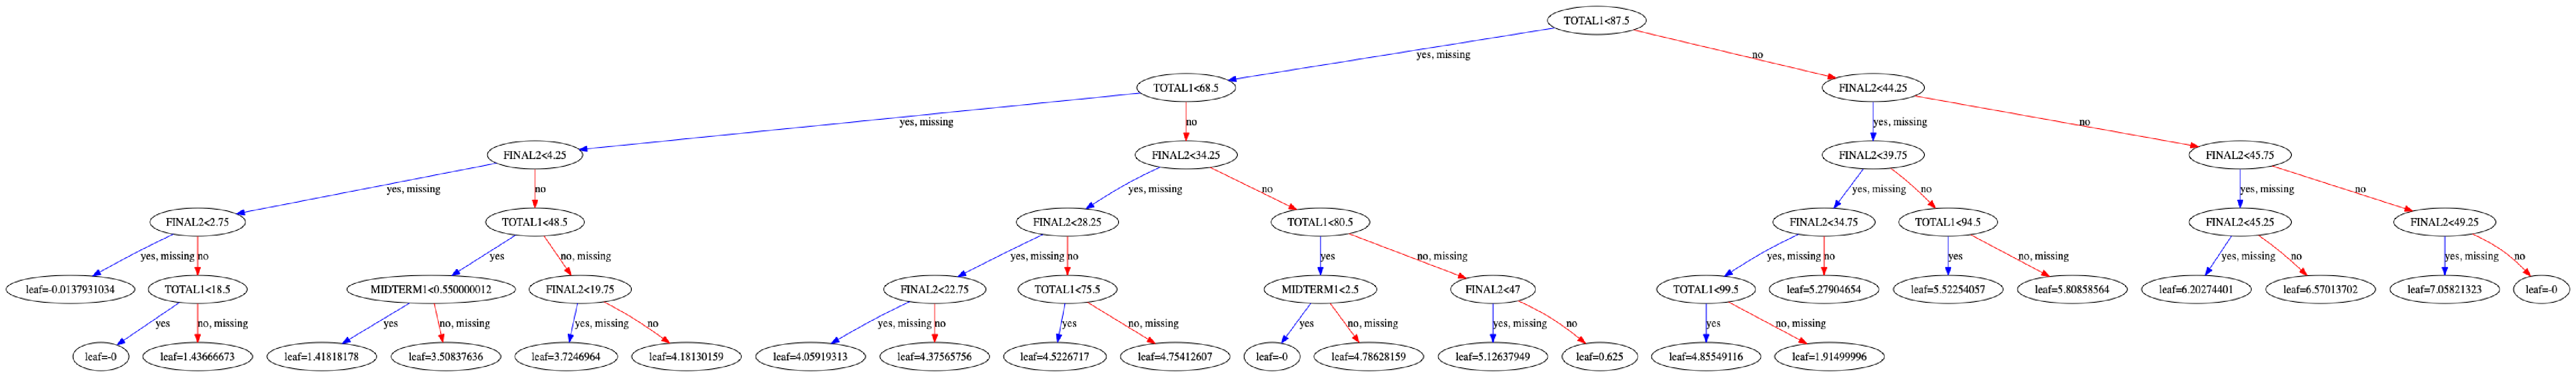

In [463]:
plt.rcParams['figure.figsize'] = [100, 100]


xgb.plot_tree(xreg,num_trees=0)
plt.show()

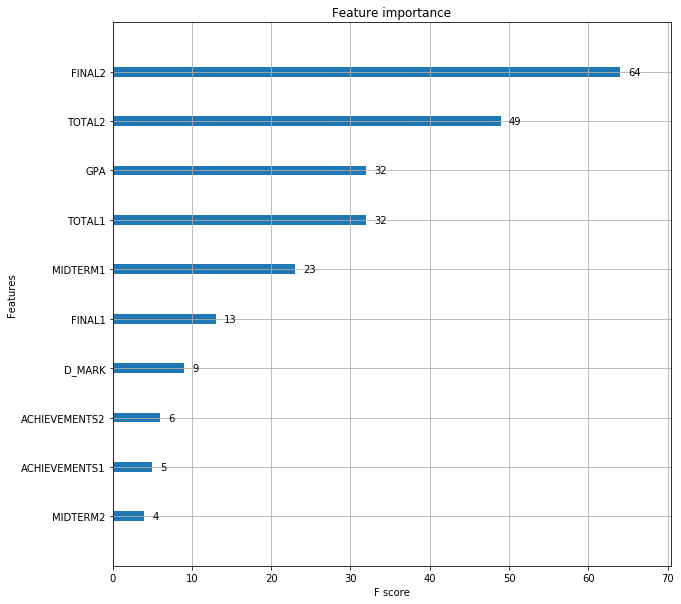

In [464]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xreg)
plt.show()

#    SandBox

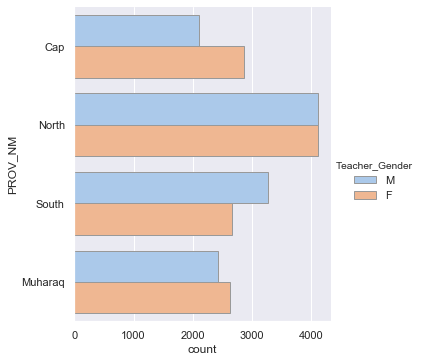

In [320]:
sns.catplot(y="PROV_NM", hue="Teacher_Gender" , kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

# Kurtosis
The exact interpretation of the measure of Kurtosis used to be disputed, but is now settled. Its about existence of outliers. Kurtosis is a measure of whether the data are heavy-tailed (profusion of outliers) or light-tailed (lack of outliers) relative to a normal distribution.

**The main difference between skewness and kurtosis is that the skewness refers to the degree of symmetry, whereas the kurtosis refers to the degree of presence of outliers in the distribution.**

- Mesokurtic
- Leptokurtic
- Platykurtic


In [482]:
arrays = [np.random.randn(3, 4) for _ in range(10)]
np.stack(arrays, axis=0).shape

(10, 3, 4)

In [ ]:
Anova Test(F-Test)
One Way F-test(Anova)


In [12]:
df.head()

,CPR_NO,NAME,ENAME,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
CPR_NO,,,,,,,,,,,,,,,,,,
70913390,70913390,ابراهيم خليل ابراهيم العرادي,EBRAHIM KHALIL EBRAHIM ALARADI,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
71105956,71105956,احمد محمد احمد عبدالله,AHMED MOHAMED AHMED ABDULLA,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
70712190,70712190,احمد محمد حسن عبدالمهدي الشيخ عبدالله,AHMED MOHAMED HASAN A.MAHDI SH.ABDULLA,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
70207496,70207496,السيد حسن علي ابراهيم شبر,SAYED HASAN ALI EBRAHIM SHUBBAR,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
70507953,70507953,السيدحسن علي عباس عبدالنبي,SAYED HASAN ALI ABBAS ABDULNABI,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [416]:
from sklearn.compose import make_column_selector
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df.index=df.CPR_NO
df=df.drop("CPR_NO", axis=1)

In [436]:
df1=df.copy()

In [437]:
encoder=OrdinalEncoder()

df1[["SCH_NM","PROV_NM","SUBM","Teacher_Gender"]]=encoder.fit_transform(df1[["SCH_NM","PROV_NM","SUBM","Teacher_Gender"]])

In [438]:
df1.head()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,GPA_class,NAT_class
CPR_NO,,,,,,,,,,,,,,,,,
70913390,0.0,0.0,1.0,1.0,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,>90,<60
71105956,0.0,0.0,1.0,1.0,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,80-90,<60
70712190,0.0,0.0,1.0,1.0,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,80-90,<60
70207496,0.0,0.0,1.0,1.0,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,80-90,<60
70507953,0.0,0.0,1.0,1.0,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,80-90,<60


In [439]:
columns=['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1','MIDTERM1','TOTAL1', 'FINAL1'  ]

In [440]:
X=df1[columns]
X.head()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,TOTAL1,FINAL1
CPR_NO,,,,,,,,
70913390,0.0,0.0,1.0,1.0,28.0,17.0,90.0,45.0
71105956,0.0,0.0,1.0,1.0,27.0,14.0,83.0,41.5
70712190,0.0,0.0,1.0,1.0,27.0,13.0,68.0,27.5
70207496,0.0,0.0,1.0,1.0,26.0,15.0,85.0,44.0
70507953,0.0,0.0,1.0,1.0,25.0,14.0,71.0,31.5


In [441]:
y=df1["NAT_class"]

In [442]:
X_train, X_test, y_train ,y_test=train_test_split(X, y , test_size=0.7, random_state=42, stratify=y)

In [443]:
X_train.head()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,TOTAL1,FINAL1
CPR_NO,,,,,,,,
80103928,76.0,0.0,0.0,0.0,29.0,18.0,96.0,49.0
80105297,41.0,3.0,0.0,0.0,27.0,14.0,66.0,24.5
70902020,63.0,1.0,1.0,0.0,28.5,17.0,89.0,43.0
70208840,0.0,0.0,1.0,1.0,26.0,15.0,74.0,33.0
70911649,52.0,1.0,1.0,0.0,25.5,18.0,89.0,45.0


In [444]:
X_train.to_csv('train.csv', index=False, header=False, columns=columns)

In [445]:
X_test.to_csv('validation.csv', index=False, header=False, columns=columns)

In [354]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [355]:
numerical_pipeline=make_pipeline( SimpleImputer(), StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                  OneHotEncoder())

In [356]:
preprocessor= make_column_transformer( (numerical_pipeline , numerical_features),
                       (categorical_pipeline,   categorical_features))

In [357]:
model=make_pipeline(preprocessor, SVC(random_state=1) )

In [362]:
# pipe_svc = make_pipeline(StandardScaler(),
#                          SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]


In [ ]:
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  refit=True,
                  n_jobs=-1)


In [ ]:
gs = gs.fit(X_train, y_train)

In [359]:


print(gs.best_score_)
#0.9846153846153847
print(gs.best_params_)
#{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

0.8448482140735283
{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}


In [425]:
from sklearn.model_selection import cross_val_score
gs = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring='accuracy',
                   cv=2)
scores = cross_val_score(gs, X_train, y_train,
                          scoring='accuracy', cv=5)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


In [365]:

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                       np.std(scores)))

CV accuracy: 0.842 +/- 0.006


In [412]:
y=df.iloc[:,-1]

In [413]:
X=df.iloc[:,:-2]

In [414]:
X_train, X_test, y_train ,y_test=train_test_split(X, y , test_size=0.7, random_state=42, stratify=y)

In [426]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(
                      random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3,
                                             4, 5, 6,
                                             7, None]}],
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

CV accuracy: 0.836 +/- 0.009


In [526]:
df_copy.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,GPA_class,NAT_class
0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,>90,<60
1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,80-90,<60
2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,80-90,<60
3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,80-90,<60
4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,80-90,<60


In [528]:
from sklearn.compose import ColumnTransformer

le=ColumnTransformer([('encoder', LabelEncoder(), [0]), remainder='passthrough'])

d_copy=le.fit_transform(df), dtype=nd.str)

SyntaxError: invalid syntax (<ipython-input-528-c85c45b6c9f5>, line 3)

In [400]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [401]:
params = {
        'xgbclassifier__gamma': [0.5, 1],
        'xgbclassifier__max_depth': [3, 4]
        }

In [402]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [403]:
preprocess = make_column_transformer(
    (numerical_features, StandardScaler()),
    ### Need to be numeric not string to specify columns name 
    (categorical_features, OneHotEncoder(sparse=False))
)

In [404]:
model_xgb = make_pipeline(
    preprocess,
    xgboost.XGBClassifier(
                          n_estimators=600,
                          objective='binary:logistic',
                          silent=True,
                          nthread=1)
)

In [405]:
skf = StratifiedKFold(n_splits=3,
                      shuffle = True,
                      random_state = 1001)

random_search = RandomizedSearchCV(model_xgb,
                                   param_distributions=params,
                                   n_iter=4,
                                   scoring='accuracy',
                                   n_jobs=4,
                                   cv=skf.split(X_train, y_train),
                                   verbose=3,
                                   random_state=1001)

In [ ]:
#grid_xgb = GridSearchCV(model_xgb, params, cv=10, iid=False)
random_search.fit(X_train, y_train)

In [ ]:
params={
    "polynomialfeatures__degree":[2,3,4],
    "sgdclassifier__penalty": ['l1', 'l2']
}


In [ ]:
grid=GridSearchCV(model, param_grid=params,cv=4 )



In [ ]:
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
model=make_pipeline(preprocessor, SGDClassifier())


In [ ]:
model.fit(X, y )